Trecho de código de bibliotecas

In [1]:
install.packages("gridExtra")
#install.packages("plotly")
#install.packages("agricolae")
#install.packages("repr")
#install.packages("ggplot2")
#install.packages("tidyverse") 
#install.packages("repr")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
#bibliotecas a serem utilizadas 
#visualização de RMSE no jupyter
library(ggplot2)
library(tidyverse)
#library to plot two or more plots in a grid
library(gridExtra)
library(repr)
library(plotly)




Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine


Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



Trecho de código de leitura dos dados:

In [9]:
tsDia1=as.data.frame(read.table("../ESC/150-2100/dias/dia2.txt"))
names(tsDia1)=c("Dia1")
kalman=as.data.frame(read.table("../ESC/150-2100/resultados/df_kalmanSmoothing.txt"))
inter=as.data.frame(read.table("../ESC/150-2100/resultados/df_linear_interpolation.txt"))
locf=as.data.frame(read.table("../ESC/150-2100/resultados/df_locf.txt"))
mean=as.data.frame(read.table("../ESC/150-2100/resultados/df_mean.txt"))
median=as.data.frame(read.table("../ESC/150-2100/resultados/df_median.txt"))
malExp=as.data.frame(read.table("../ESC/150-2100/resultados/df_movingAverage_exponential.txt"))
malLin=as.data.frame(read.table("../ESC/150-2100/resultados/df_movingAverage_linear.txt"))
malSim=as.data.frame(read.table("../ESC/150-2100/resultados/df_movingAverage_simple.txt"))
spl=as.data.frame(read.table("../ESC/150-2100/resultados/df_spline_interpolation.txt"))
sti=as.data.frame(read.table("../ESC/150-2100/resultados/df_stine_interpolation.txt"))
names(kalman)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(inter)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(locf)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(mean)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(median)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malExp)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malLin)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malSim)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(spl)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(sti)=c("algoritmo" , "rmse", "mse", "mae", "mape")

Trecho de código de funções de tratamento

In [10]:
#função que retorna a média das métricas a partir do tamanho da lacuna, ou seja, 
#media de todas as lacunas de tamanho 1,2,3...n
#Passando como parâmetro os dados, a métrica e o tipo(media, sd ou var)

mediaQuartis <- function(data_vector, metrica, quartil){
    tst=data_vector %>% select(metrica)
    mediaLac=c()
    media=c()
    for(z in seq(1,40,1)){
        for (i in seq(z,3600,120)){
            if(quartil==1){
                mediaLac=append(mediaLac, tst[i,])
            } else if(quartil==2){
                mediaLac=append(mediaLac, tst[i+40,])

            }else if(quartil==3){
                mediaLac=append(mediaLac, tst[i+80,])
            }
        }
    }
      for (i in seq(1,1200,30)) {
          media=append(media,(mean(mediaLac[i:(i+29)])))
      }   
    return (media)
}


Trecho de código de construção dos dataframes dos quartos:

In [34]:
tamanhoGap= seq(150,2100,50) 
quartisSti=as.data.frame(mediaQuartis(sti, "rmse", 1))
names(quartisSti)=c("q2")
quartisSti$q3=mediaQuartis(sti, "rmse", 2)
quartisSti$q4=mediaQuartis(sti, "rmse", 3)
quartisSti$tamanho=tamanhoGap
quartisSti$Algoritmo="Stine"

quartisInter=as.data.frame(mediaQuartis(inter, "rmse", 1))
names(quartisInter)=c("q2")
quartisInter$q3=mediaQuartis(inter, "rmse", 2)
quartisInter$q4=mediaQuartis(inter, "rmse", 3)
quartisInter$tamanho=tamanhoGap
quartisInter$Algoritmo="Interpolation"

quartisKal=as.data.frame(mediaQuartis(kalman, "rmse", 1))
names(quartisKal)=c("q2")
quartisKal$q3=mediaQuartis(kalman, "rmse", 2)
quartisKal$q4=mediaQuartis(kalman, "rmse", 3)
quartisKal$tamanho=tamanhoGap
quartisKal$Algoritmo="Kalman"

quartisLocf=as.data.frame(mediaQuartis(locf, "rmse", 1))
names(quartisLocf)=c("q2")
quartisLocf$q3=mediaQuartis(locf, "rmse", 2)
quartisLocf$q4=mediaQuartis(locf, "rmse", 3)
quartisLocf$tamanho=tamanhoGap
quartisLocf$Algoritmo="Locf"

quartisMean=as.data.frame(mediaQuartis(mean, "rmse", 1))
names(quartisMean)=c("q2")
quartisMean$q3=mediaQuartis(mean, "rmse", 2)
quartisMean$q4=mediaQuartis(mean, "rmse", 3)
quartisMean$tamanho=tamanhoGap
quartisMean$Algoritmo="Mean"

quartisMedian=as.data.frame(mediaQuartis(median, "rmse", 1))
names(quartisMedian)=c("q2")
quartisMedian$q3=mediaQuartis(median, "rmse", 2)
quartisMedian$q4=mediaQuartis(median, "rmse", 3)
quartisMedian$tamanho=tamanhoGap
quartisMedian$Algoritmo="Median"

quartisMalExp=as.data.frame(mediaQuartis(malExp, "rmse", 1))
names(quartisMalExp)=c("q2")
quartisMalExp$q3=mediaQuartis(malExp, "rmse", 2)
quartisMalExp$q4=mediaQuartis(malExp, "rmse", 3)
quartisMalExp$tamanho=tamanhoGap
quartisMalExp$Algoritmo="EMA"

quartisMalLin=as.data.frame(mediaQuartis(malLin, "rmse", 1))
names(quartisMalLin)=c("q2")
quartisMalLin$q3=mediaQuartis(malLin, "rmse", 2)
quartisMalLin$q4=mediaQuartis(malLin, "rmse", 3)
quartisMalLin$tamanho=tamanhoGap
quartisMalLin$Algoritmo="LMA"

quartisMalSim=as.data.frame(mediaQuartis(malSim, "rmse", 1))
names(quartisMalSim)=c("q2")
quartisMalSim$q3=mediaQuartis(malSim, "rmse", 2)
quartisMalSim$q4=mediaQuartis(malSim, "rmse", 3)
quartisMalSim$tamanho=tamanhoGap
quartisMalSim$Algoritmo="SMA"

quartisSpl=as.data.frame(mediaQuartis(spl, "rmse", 1))
names(quartisSpl)=c("q2")
quartisSpl$q3=mediaQuartis(spl, "rmse", 2)
quartisSpl$q4=mediaQuartis(spl, "rmse", 3)
quartisSpl$tamanho=tamanhoGap
quartisSpl$Algoritmo="Spline"
todosQuartis=rbind(quartisInter, quartisKal, quartisLocf, quartisMean, quartisMedian, quartisMalExp, quartisMalSim, quartisMalLin, quartisSti)

Experimento 2
==
Como dito anteriormente, as lacunas foram feitas em três pontos da série temporal. 2160, 4320 e 6480 com granularidade de 1.
* Como os experimentos foram feitos em lugares distintos, os seus resultados precisam ser estudados separadamente. 


Comentários estatístisticos: 
* Como as universos são grandes, investigar todos os elementos populacionais, em geral, necessita muito tempo, o custo é elevado, o processo de investigação leva a destruição do elemento observado.
* Dados quantitativos: quando o resultado da observação é um número, decorrente de um processo de mensuração ou contagem.
* Contínua: resultam de infinitos valores possíveis que correspondem a alguma escala contínua que cobre um intervalo de valores.

Boxplot
===
Plotagem do boxplot do resultados dos algoritmos estudados. 

Quartis: 

Warning message:
“Removed 12 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 8 rows containing non-finite values (stat_boxplot).”

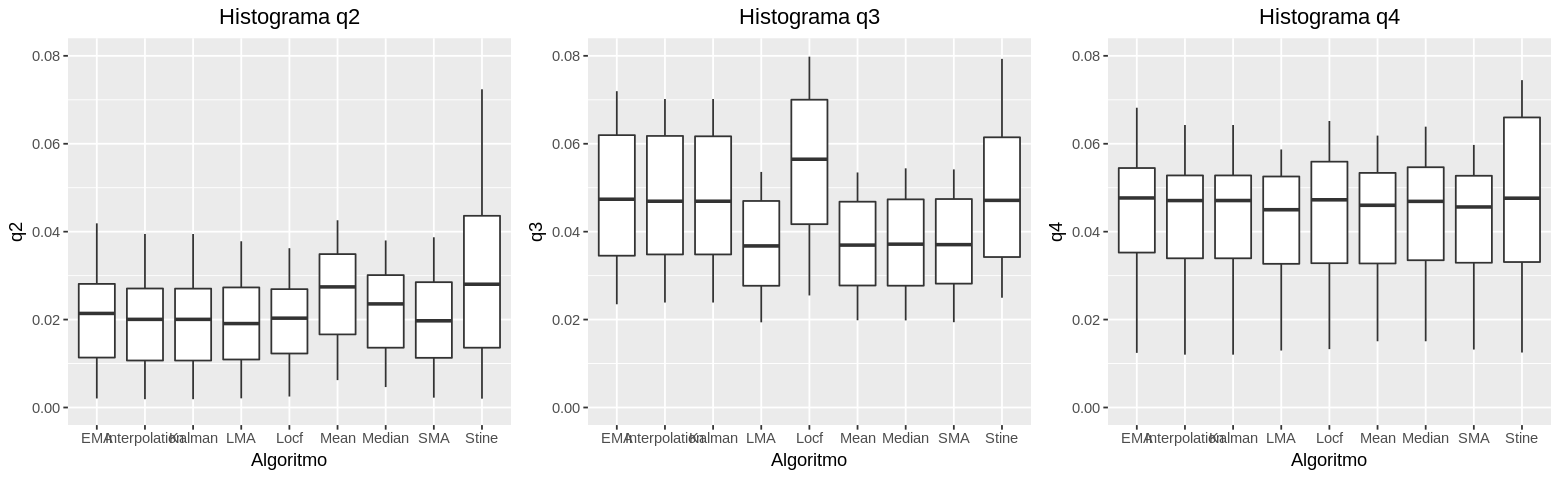

In [35]:
options(repr.plot.width=13, repr.plot.height=4)
min=0
max=1
p1=ggplot(todosQuartis, aes(x=Algoritmo, y=q2)) + 
    geom_boxplot()+
    ggtitle("Histograma q2")+  theme(plot.title = element_text(hjust = 0.5))
p2=ggplot(todosQuartis, aes(x=Algoritmo, y=q3)) + 
    geom_boxplot() +

    ggtitle("Histograma q3")+  theme(plot.title = element_text(hjust = 0.5))
    
p3=ggplot(todosQuartis, aes(x=Algoritmo, y=q4)) + 
    geom_boxplot() +
    ggtitle("Histograma q4")+  theme(plot.title = element_text(hjust = 0.5))
min=0
max=0.08
grid.arrange(p1+ylim(min,max),p2+ylim(min,max),p3+ylim(min,max), ncol=3)

Como pode ser visto, no primeiro quarto de imputação de dados a capacidade de imoutação é maior que nos outros quartos devido o estilo de uso da residência da monitorada no ÉdaSuaConta. Por exemplo, o padrão de uso na 6 a 12 horas matêm um padrão, logo por ter poucas mudanças é mais fácil da imoutação ter uma maior acurácia. Plotando um por um para estudo posterior: 

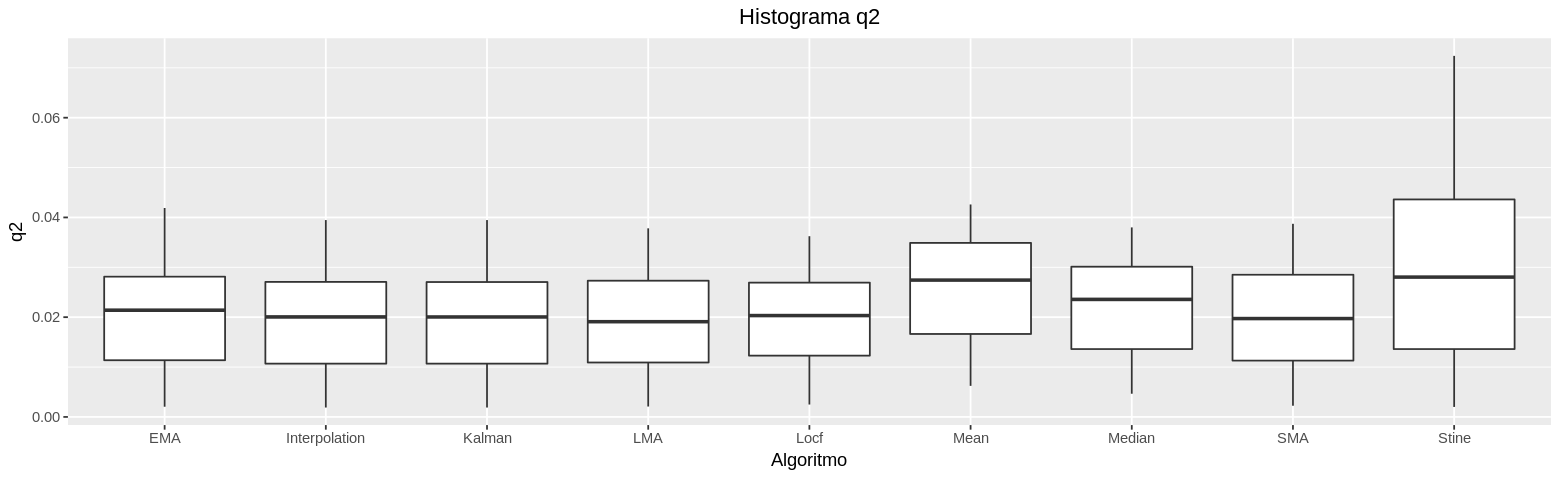

In [36]:
ggplot(todosQuartis[which(todosQuartis$Algoritmo!="Spline"),], aes(x=Algoritmo, y=q2)) + 
    geom_boxplot()+
    ggtitle("Histograma q2")+  theme(plot.title = element_text(hjust = 0.5))

Como Mean, median e spline tem valores muito maiores que os demais, vamos plotar o boxplot sem eles. 
Com esse boxplot da para verificar que todos tem valores bem próximos, entretanto Interpolation, Kalman, Stine, EMA tem valores de média menores. 

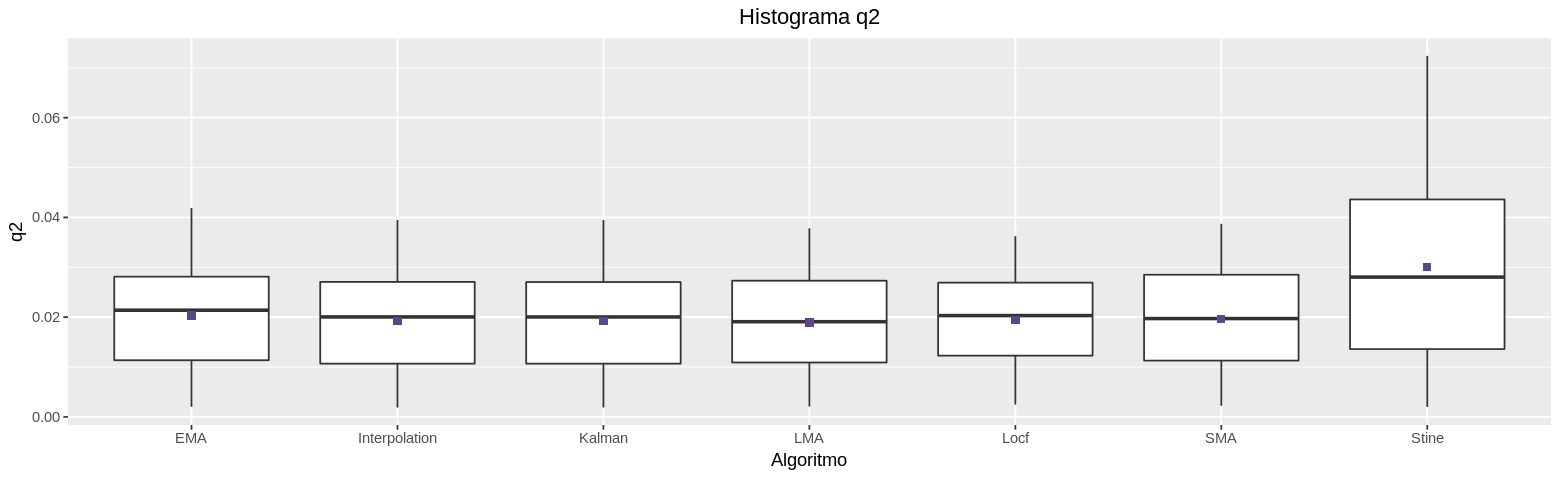

In [37]:
p1=ggplot(todosQuartis[which(todosQuartis$Algoritmo!="Spline" & todosQuartis$Algoritmo!="Median" & todosQuartis$Algoritmo!="Mean"),], aes(x=Algoritmo, y=q2)) + 
    geom_boxplot()+
    ggtitle("Histograma q2")+  theme(plot.title = element_text(hjust = 0.5))+
    stat_summary(fun.y = "mean", geom = "point", colour = "mediumpurple4", shape = 15, size = 2)
p1

Verificando os outros Quartos. 
Q2: 


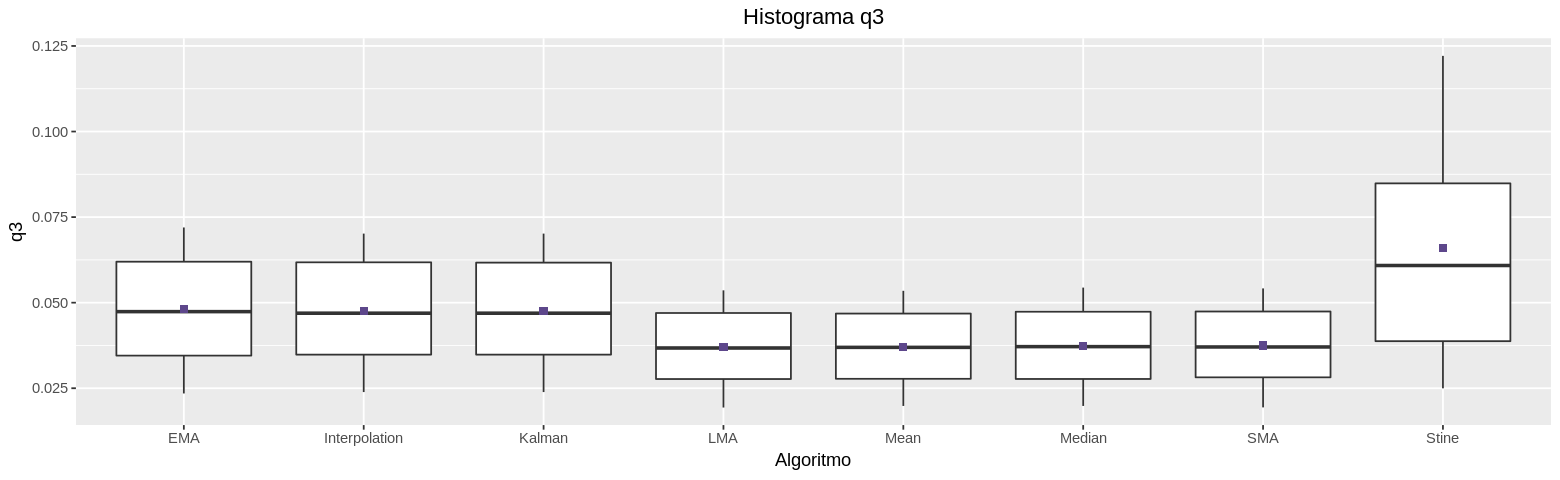

In [38]:
p2=ggplot(todosQuartis[which(todosQuartis$Algoritmo!="Spline" &todosQuartis$Algoritmo!="Locf"),], aes(x=Algoritmo, y=q3)) + 
    geom_boxplot()+
    ggtitle("Histograma q3")+  theme(plot.title = element_text(hjust = 0.5))+
    stat_summary(fun.y = "mean", geom = "point", colour = "mediumpurple4", shape = 15, size = 2)
p2

<b>Verifica-se que os resultados são bastante parecidos em Q3

Verificando Q4
--

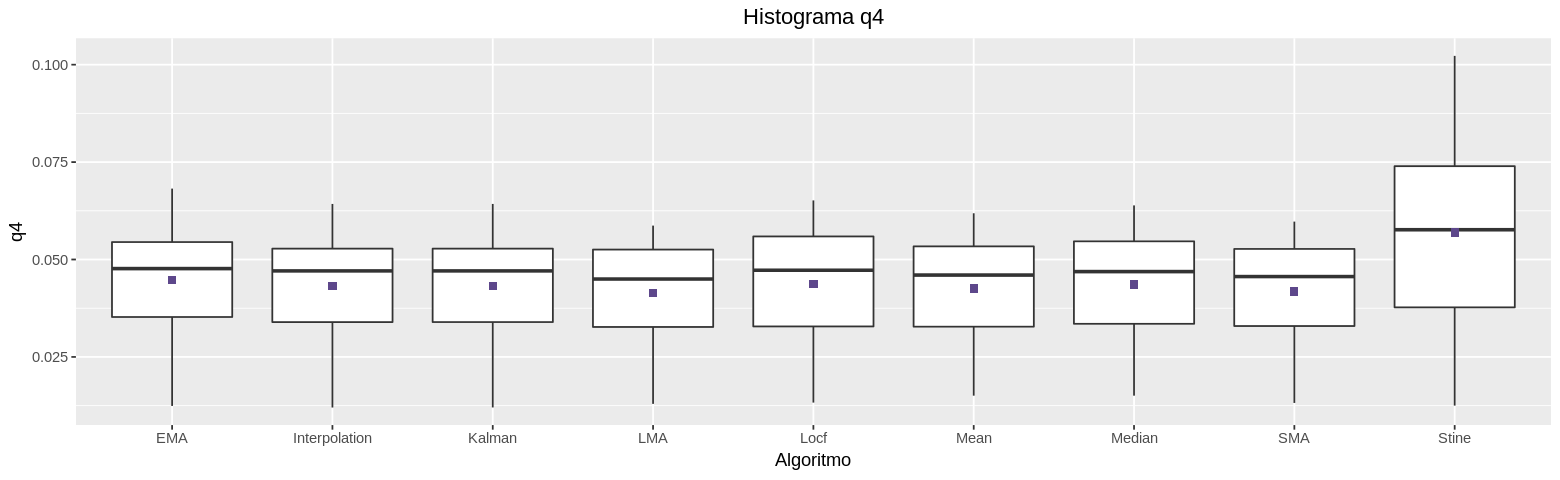

In [39]:
p3=ggplot(todosQuartis[which(todosQuartis$Algoritmo!="Spline"),], aes(x=Algoritmo, y=q4)) + 
    geom_boxplot()+
    ggtitle("Histograma q4")+  theme(plot.title = element_text(hjust = 0.5))+
    stat_summary(fun.y = "mean", geom = "point", colour = "mediumpurple4", shape = 15, size = 2)
p3

Aqui podemos notar que a capacidade de imputação de dados em q4 se diferencia um pouco, com melhores resultados para o LocF, Stine, interpolation, Kalman e EMA. 
Como foi verificado a partir dos gráficos acima, interpolation e Kalman tem valores muito parecidos, isso se da pela natureza da função imputeTS, que (<b>EXPLICAR O POR QUE</b>) Dessa forma temos que decidir se vamos omitir ou não


Resultados pelos Quartis
===========
Nos gráficos abaixo podem sererm vistos os resultados da imputação de dados dos quartis 2,3 e 4 de 0 a 100


In [40]:
#options(repr.plot.width=10, repr.plot.height=20)
#min=min(todosQuartis$q2, todosQuartis$q3, todosQuartis$q4)
#max=max(todosQuartis$q2, todosQuartis$q3, todosQuartis$q4)

todosq2=ggplot(todosQuartis, aes(x=tamanho,y=q2, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
#ylim(min,max) + 
#scale_x_continuous(expand = c(0, )) + scale_y_continuous(expand = c(0, 0))+
ggtitle("Segundo Quarto")+  theme(plot.title = element_text(hjust = 0.5))


todosq3=ggplot(todosQuartis, aes(x=tamanho,y=q3, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
#ylim(min,max) + 
ggtitle("Terceiro Quarto")+  theme(plot.title = element_text(hjust = 0.5))

todosq4=ggplot(todosQuartis, aes(x=tamanho,y=q4, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
#ylim(min,max) + 
ggtitle("Quarto Quarto")+  theme(plot.title = element_text(hjust = 0.5))

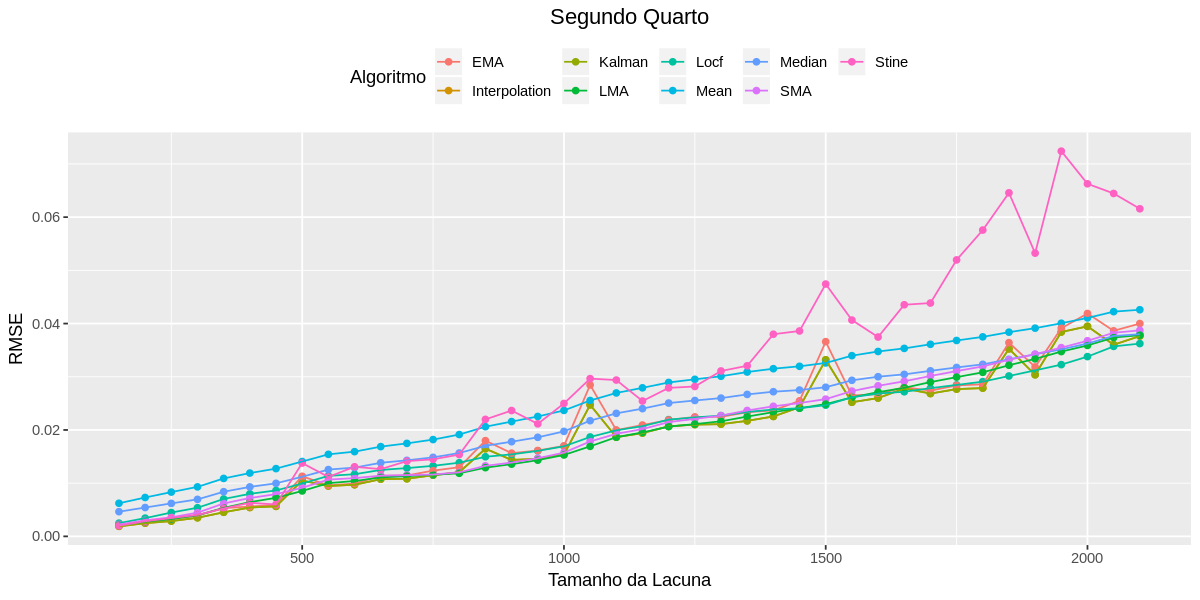

In [41]:
options(repr.plot.width=10, repr.plot.height=5)
todosq2

Zoom no gráfico para verificar o comportamento de 0 a 25
--


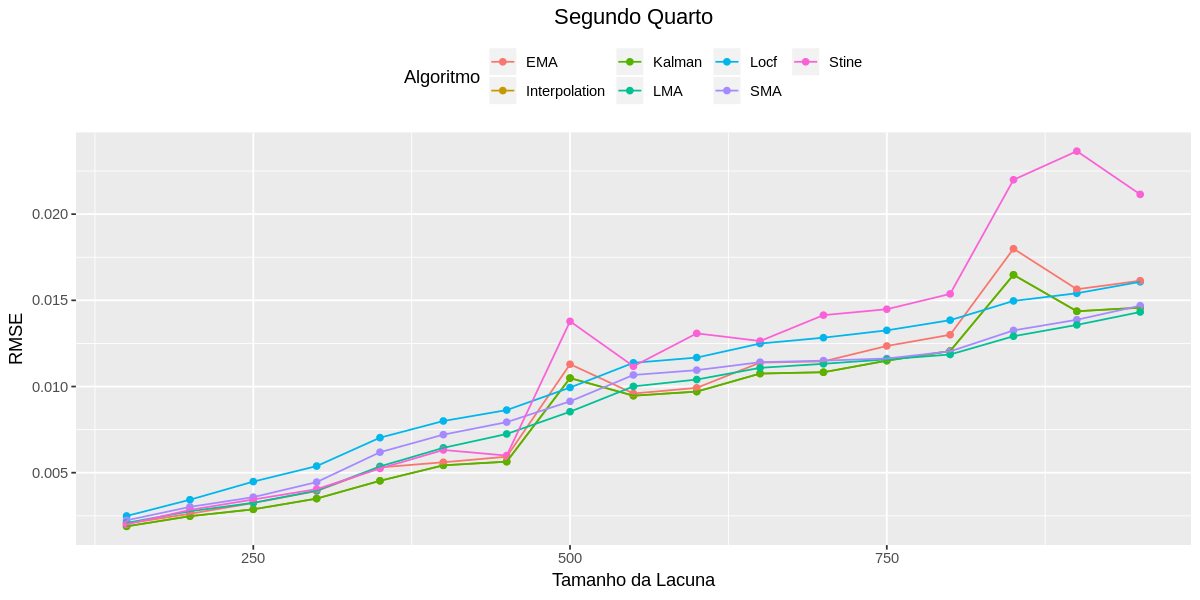

In [42]:
ggplot(todosQuartis[which(todosQuartis$tamanho<1000 & todosQuartis$Algoritmo!="Mean" & todosQuartis$Algoritmo!="Median" & todosQuartis$Algoritmo !="Spline"),], aes(x=tamanho,y=q2, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
#ylim(min,max) + 
#scale_x_continuous(expand = c(0, )) + scale_y_continuous(expand = c(0, 0))+
ggtitle("Segundo Quarto")+  theme(plot.title = element_text(hjust = 0.5))

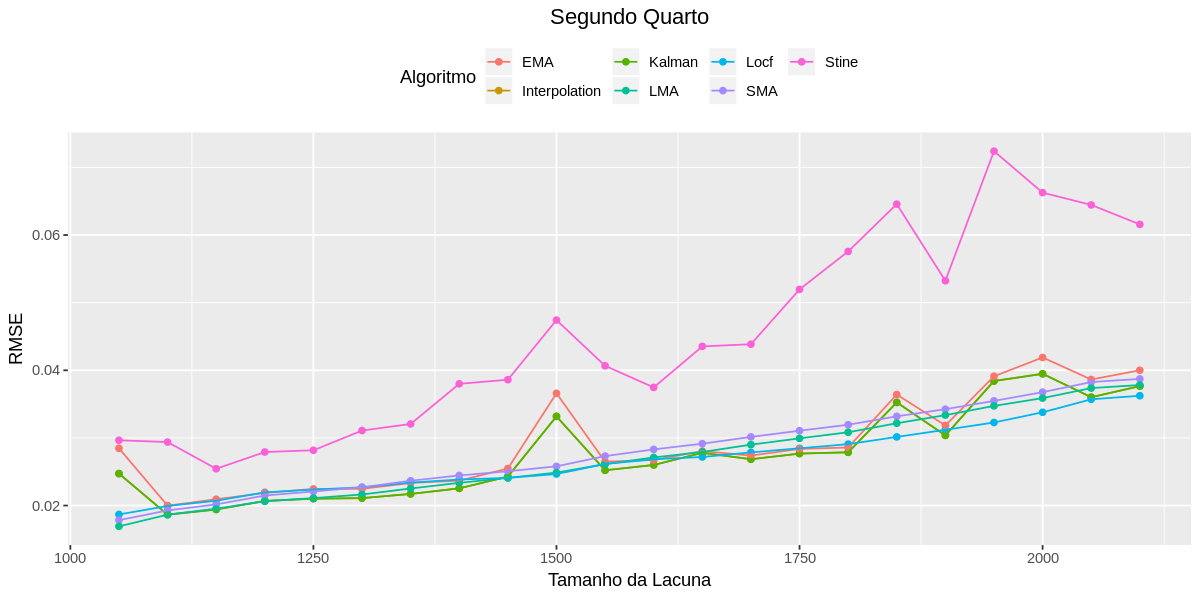

In [43]:
ggplot(todosQuartis[which(todosQuartis$tamanho>1000 & todosQuartis$Algoritmo!="Mean" & todosQuartis$Algoritmo!="Median" & todosQuartis$Algoritmo !="Spline"),], aes(x=tamanho,y=q2, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
#ylim(min,max) + 
#scale_x_continuous(expand = c(0, )) + scale_y_continuous(expand = c(0, 0))+
ggtitle("Segundo Quarto")+  theme(plot.title = element_text(hjust = 0.5))

Verificação do comportamento em Q3
---

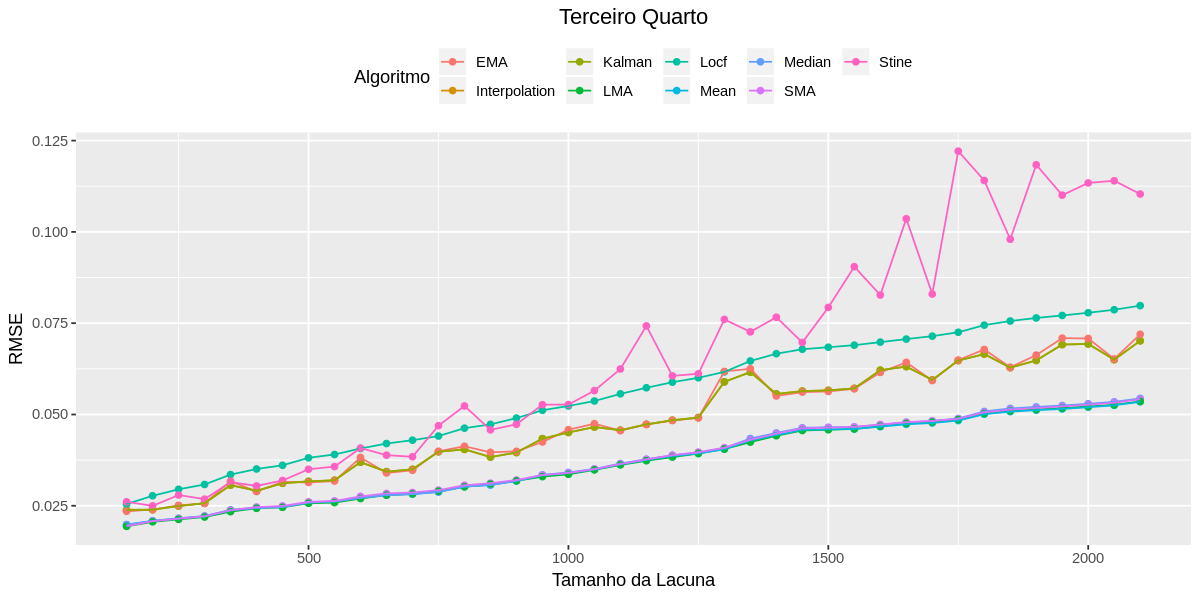

In [44]:
todosq3

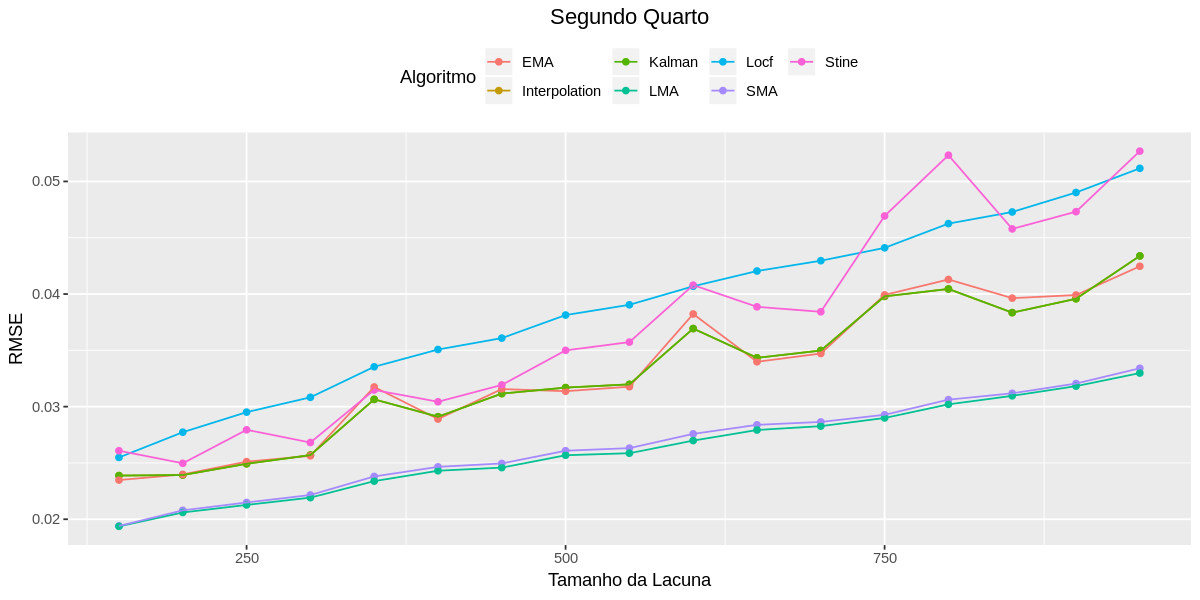

In [46]:
ggplot(todosQuartis[which(todosQuartis$tamanho<1000 & todosQuartis$Algoritmo!="Mean" & todosQuartis$Algoritmo!="Median" & todosQuartis$Algoritmo !="Spline"),], aes(x=tamanho,y=q3, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
#ylim(min,max) + 
#scale_x_continuous(expand = c(0, )) + scale_y_continuous(expand = c(0, 0))+
ggtitle("Segundo Quarto")+  theme(plot.title = element_text(hjust = 0.5))

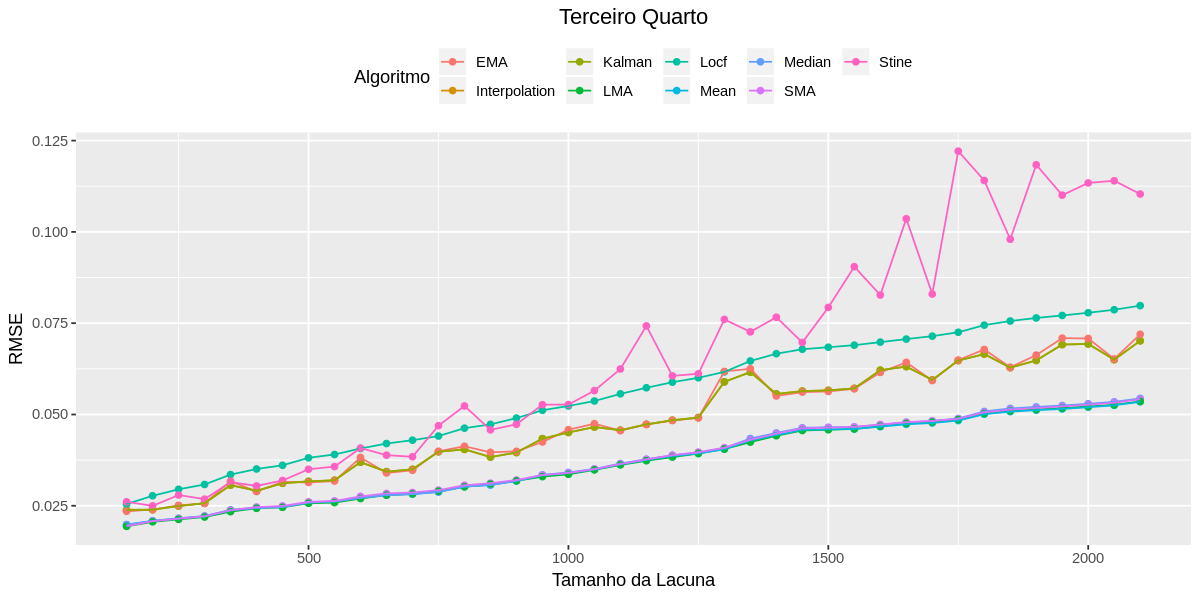

In [47]:
ggplot(todosQuartis[which(todosQuartis$Algoritmo!="Spline"),], aes(x=tamanho,y=q3, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
#ylim(min,max) + 
ggtitle("Terceiro Quarto")+  theme(plot.title = element_text(hjust = 0.5))

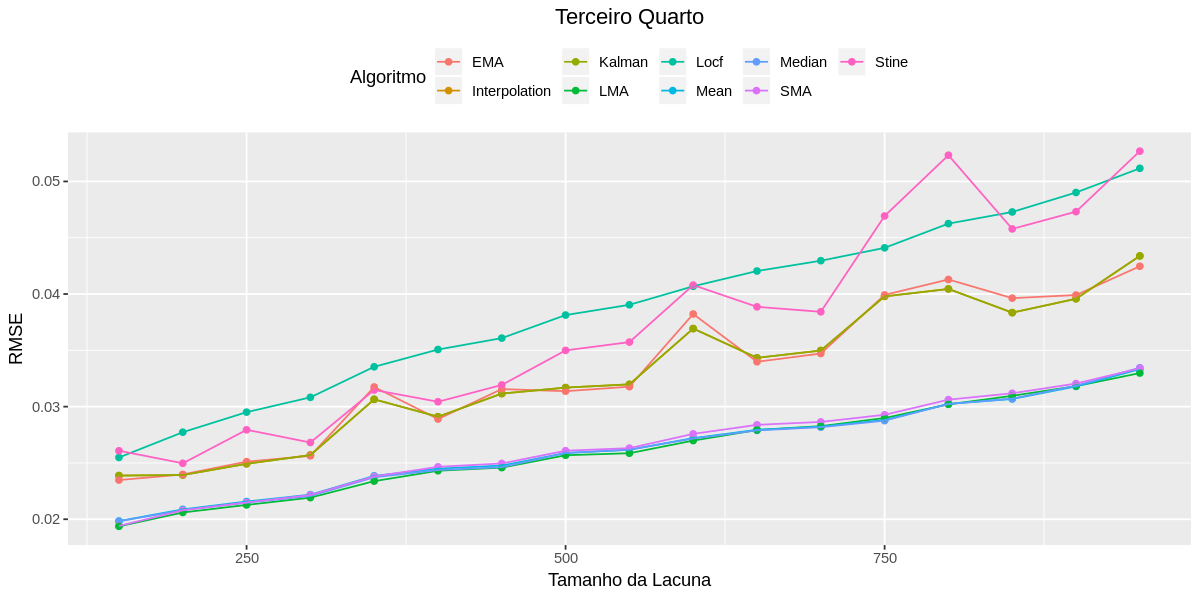

In [48]:
ggplot(todosQuartis[which(todosQuartis$Algoritmo!="Spline" & todosQuartis$tamanho<1000),], aes(x=tamanho,y=q3, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
#ylim(min,max) + 
ggtitle("Terceiro Quarto")+  theme(plot.title = element_text(hjust = 0.5))

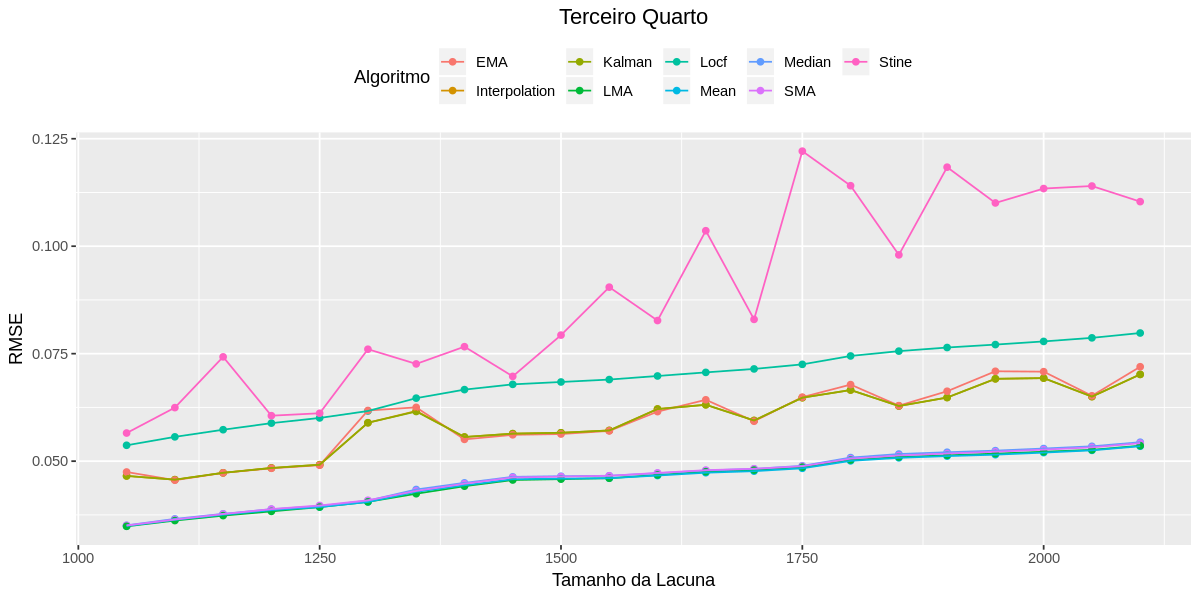

In [49]:
ggplot(todosQuartis[which(todosQuartis$Algoritmo!="Spline" & todosQuartis$tamanho>1000),], aes(x=tamanho,y=q3, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
#ylim(min,max) + 
ggtitle("Terceiro Quarto")+  theme(plot.title = element_text(hjust = 0.5))

Verificação do comportamento em Q4
---

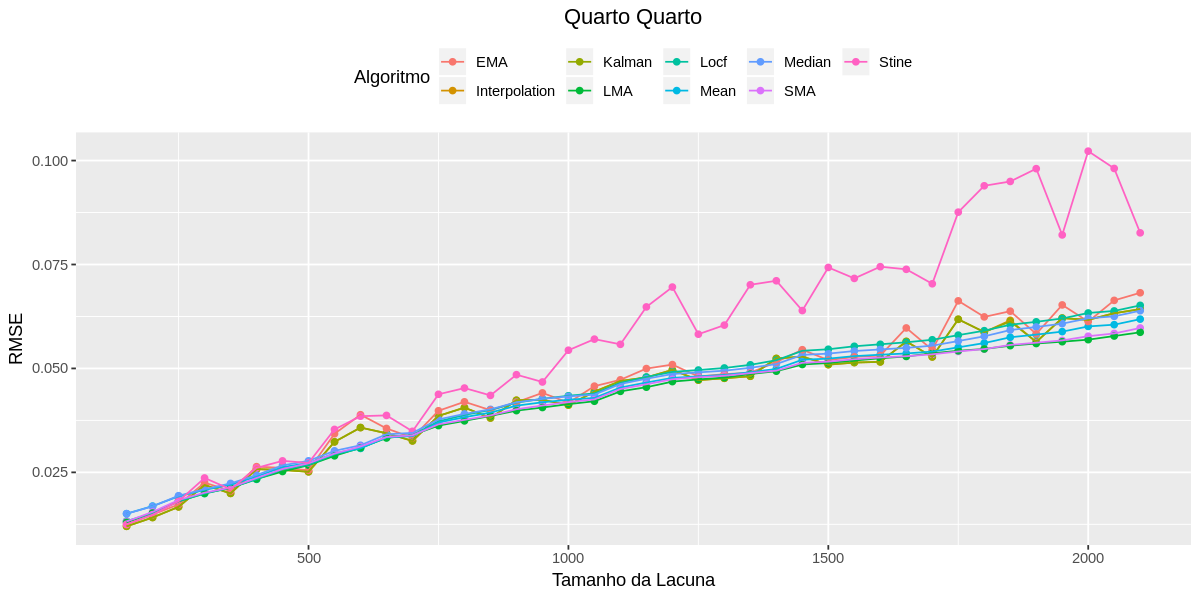

In [50]:
todosq4

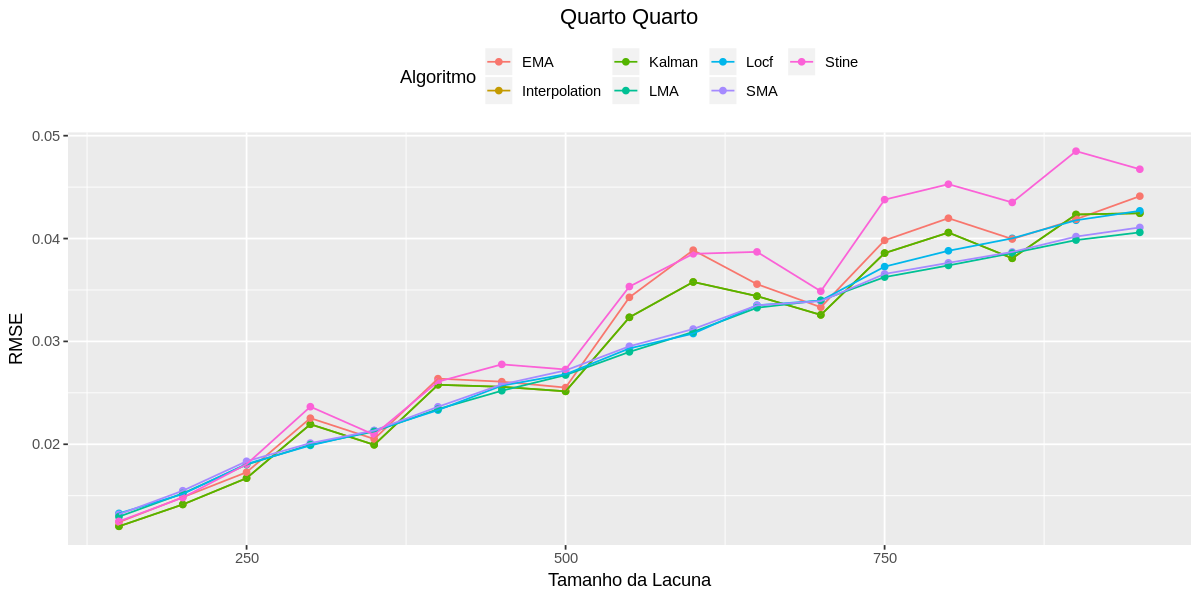

In [52]:
ggplot(todosQuartis[which(todosQuartis$tamanho<1000 & todosQuartis$Algoritmo!="Mean" & todosQuartis$Algoritmo!="Median" & todosQuartis$Algoritmo !="Spline"),], aes(x=tamanho,y=q4, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
#ylim(min,max) + 
#scale_x_continuous(expand = c(0, )) + scale_y_continuous(expand = c(0, 0))+
ggtitle("Quarto Quarto")+  theme(plot.title = element_text(hjust = 0.5))

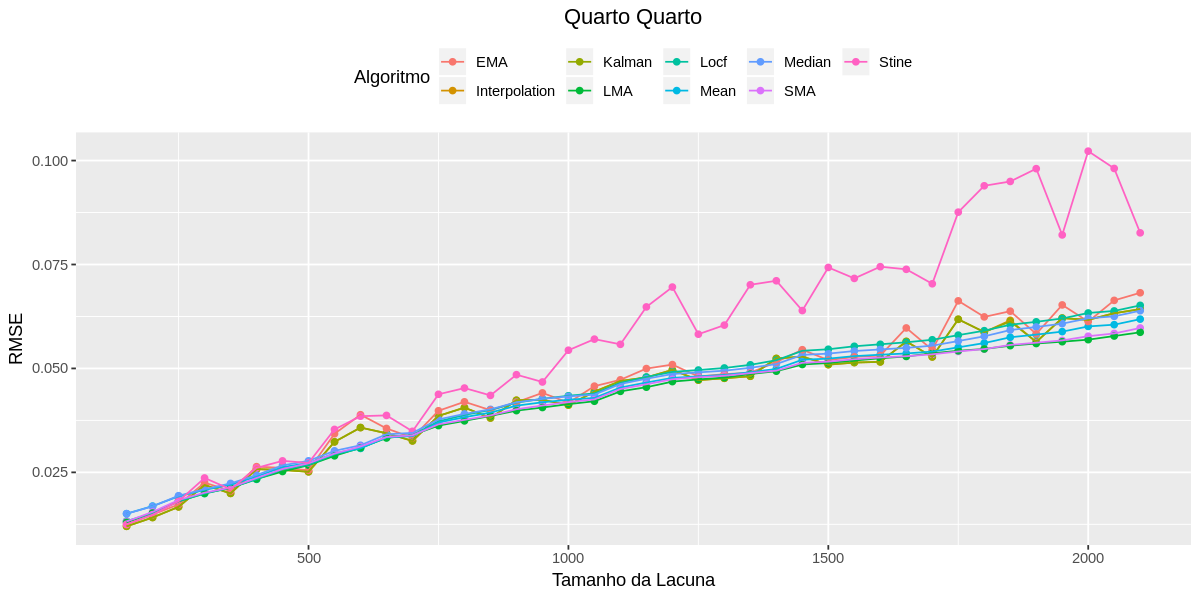

In [53]:
ggplot(todosQuartis[which(todosQuartis$Algoritmo!="Spline"),], aes(x=tamanho,y=q4, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
#ylim(min,max) + 
ggtitle("Quarto Quarto")+  theme(plot.title = element_text(hjust = 0.5))

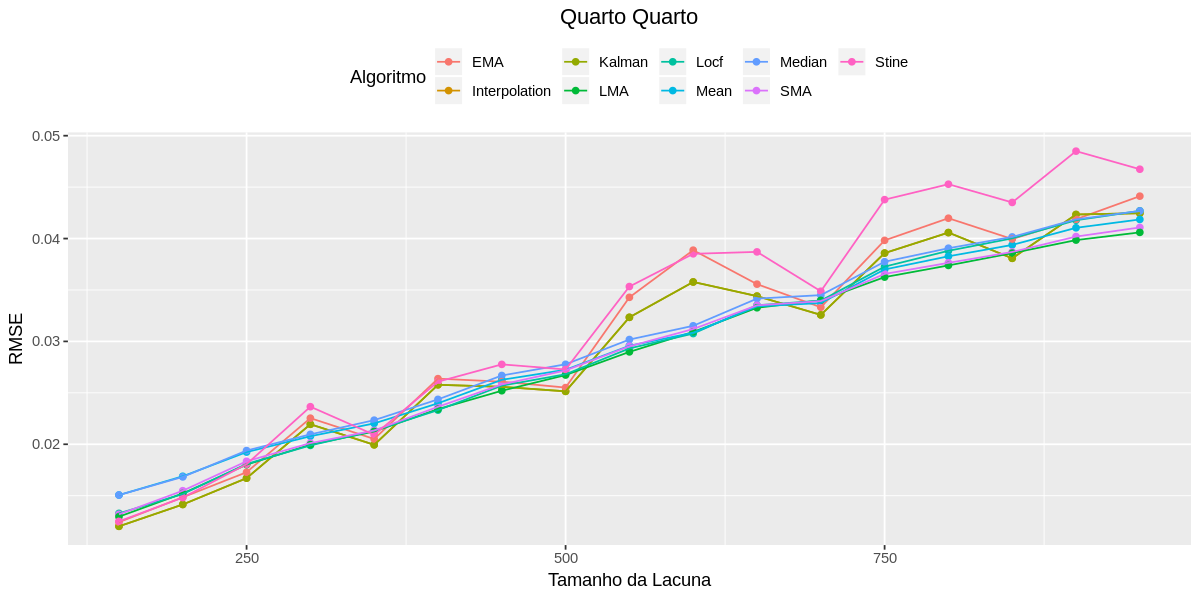

In [56]:
ggplot(todosQuartis[which(todosQuartis$Algoritmo!="Spline" & todosQuartis$tamanho<1000),], aes(x=tamanho,y=q4, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
#ylim(min,max) + 
ggtitle("Quarto Quarto")+  theme(plot.title = element_text(hjust = 0.5))

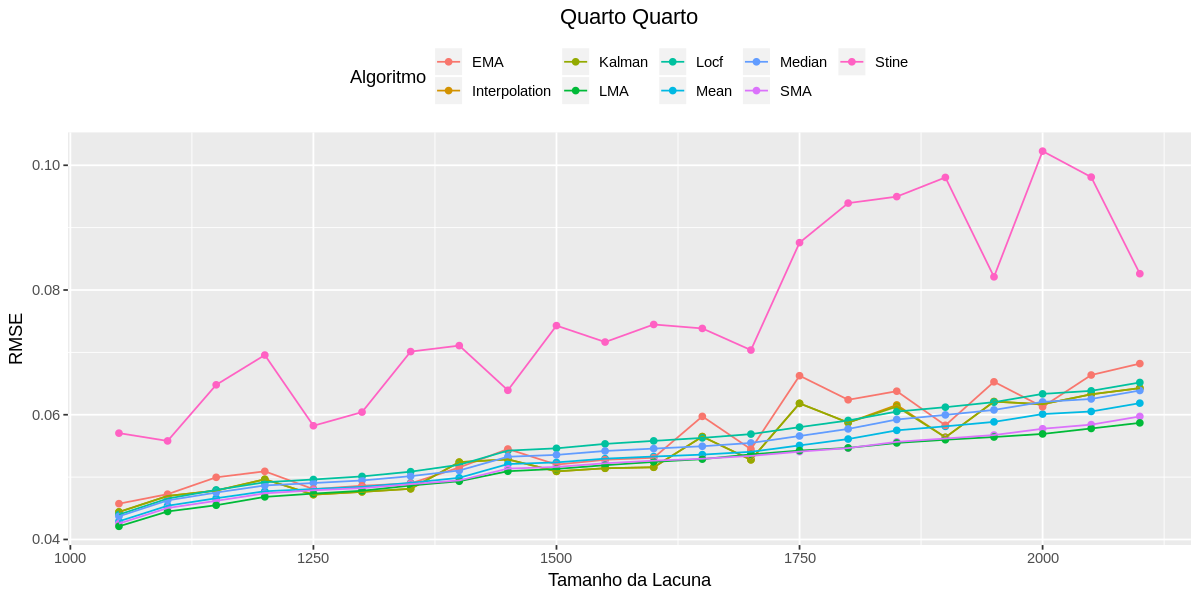

In [58]:
ggplot(todosQuartis[which(todosQuartis$Algoritmo!="Spline" & todosQuartis$tamanho>1000),], aes(x=tamanho,y=q4, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
#ylim(min,max) + 
ggtitle("Quarto Quarto")+  theme(plot.title = element_text(hjust = 0.5))

In [65]:
q2=select(todosQuartis, -q2, -q3,-q4)
q3=select(todosQuartis, -q4,-q2)
q4=select(todosQuartis, -q3,-q2)
q2$media=todosQuartis$q2

teste=(select(q2[order(q2$tamanho, q2$media, decreasing=c(FALSE,FALSE)),], media, tamanho, Algoritmo))
by_mean <- group_by(teste, tamanho)
#Agrupando o dataframe pelo tamanho e algoritmo
by_alg=group_by(teste, tamanho, Algoritmo)
#select(by_alg, -var,-error)
#sumarizando o agrupamento pela menor média
by_length=summarise(by_alg, media=min(media))
tam=by_length %>% arrange(tamanho,media)
#write.table(tam,"tamanhoEmedia.txt")
#filtrando o resultado pela menor média. 
a=by_length%>% filter(media==min(media))
write.table(a, "q2Min2100.txt")

In [64]:
q3$media=todosQuartis$q3

teste=(select(q3[order(q3$tamanho, q3$media, decreasing=c(FALSE,FALSE)),], media, tamanho, Algoritmo))
by_mean <- group_by(teste, tamanho)
#Agrupando o dataframe pelo tamanho e algoritmo
by_alg=group_by(teste, tamanho, Algoritmo)
#select(by_alg, -var,-error)
#sumarizando o agrupamento pela menor média
by_length=summarise(by_alg, media=min(media))
tam=by_length %>% arrange(tamanho,media)
#write.table(tam,"tamanhoEmedia.txt")
#filtrando o resultado pela menor média. 
a=by_length%>% filter(media==min(media))
write.table(a, "q3Min2100.txt")

In [66]:
q4$media=todosQuartis$q4
teste=(select(q4[order(q4$tamanho, q4$media, decreasing=c(FALSE,FALSE)),], media, tamanho, Algoritmo))
by_mean <- group_by(teste, tamanho)
#Agrupando o dataframe pelo tamanho e algoritmo
by_alg=group_by(teste, tamanho, Algoritmo)
#select(by_alg, -var,-error)
#sumarizando o agrupamento pela menor média
by_length=summarise(by_alg, media=min(media))
tam=by_length %>% arrange(tamanho,media)
#write.table(tam,"tamanhoEmedia.txt")
#filtrando o resultado pela menor média. 
a=by_length%>% filter(media==min(media))
write.table(a, "q4Min2100.txt")

In [68]:
#Agrupando o dataframe pelo tamanho e algoritmo
by_alg=group_by(teste, tamanho, Algoritmo)
#select(by_alg, -var,-error)
#sumarizando o agrupamento pela menor média
by_length=summarise(by_alg, media=min(media))
tam=by_length %>% arrange(tamanho,media)
write.table(tam,"tamanhoEmedia.txt")
#filtrando o resultado pela menor média. 
a=by_length%>% filter(media==min(media))
a
write.table(a, "min2100.txt")

tamanho,Algoritmo,media
150,Interpolation,0.01202315
200,Kalman,0.01414661
250,Interpolation,0.01670542
300,Locf,0.01988868
350,Interpolation,0.01994674
400,Locf,0.02332124
450,LMA,0.02520492
500,Interpolation,0.02514454
550,LMA,0.02898180
600,Locf,0.03076281


In [69]:
head(todos)
ggplot(todos, aes(x=Algoritmo, y=rmse)) + 
    geom_boxplot()
ggplot(todos[which(todos$Algoritmo!="Spline" &todos$tamanho<100),], aes(x=Algoritmo, y=rmse)) + 
    geom_boxplot()+
    stat_summary(fun.y = "mean", geom = "point", colour = "mediumpurple4", shape = 15, size = 2)


ERROR: Error in head(todos): object 'todos' not found


Plotagem do histograma de todos os resultados dos algoritmos em histograma. 

Delineamento Completamente Casualisado – DCC
--


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
metodo,8,0.004663322,0.0005829153,3.968834,0.0001619431
Residuals,351,0.051552488,0.0001468732,NA,NA


  Tukey multiple comparisons of means
    95% family-wise confidence level
    factor levels have been ordered

Fit: aov(formula = variavel ~ metodo)

$metodo
                             diff           lwr         upr     p adj
Kalman-LMA           2.542314e-04 -0.0082041510 0.008712614 1.0000000
Interpolation-LMA    2.569877e-04 -0.0082013947 0.008715370 1.0000000
Locf-LMA             4.468923e-04 -0.0080114901 0.008905275 1.0000000
SMA-LMA              7.250887e-04 -0.0077332937 0.009183471 0.9999992
EMA-LMA              1.389978e-03 -0.0070684047 0.009848360 0.9998772
Median-LMA           2.905434e-03 -0.0055529485 0.011363816 0.9778148
Mean-LMA             6.710777e-03 -0.0017476054 0.015169159 0.2471477
Stine-LMA            1.109944e-02  0.0026410538 0.019557819 0.0017029
Interpolation-Kalman 2.756325e-06 -0.0084556261 0.008461139 1.0000000
Locf-Kalman          1.926609e-04 -0.0082657215 0.008651043 1.0000000
SMA-Kalman           4.708574e-04 -0.0079875250 0.008929240 1.0000000
E

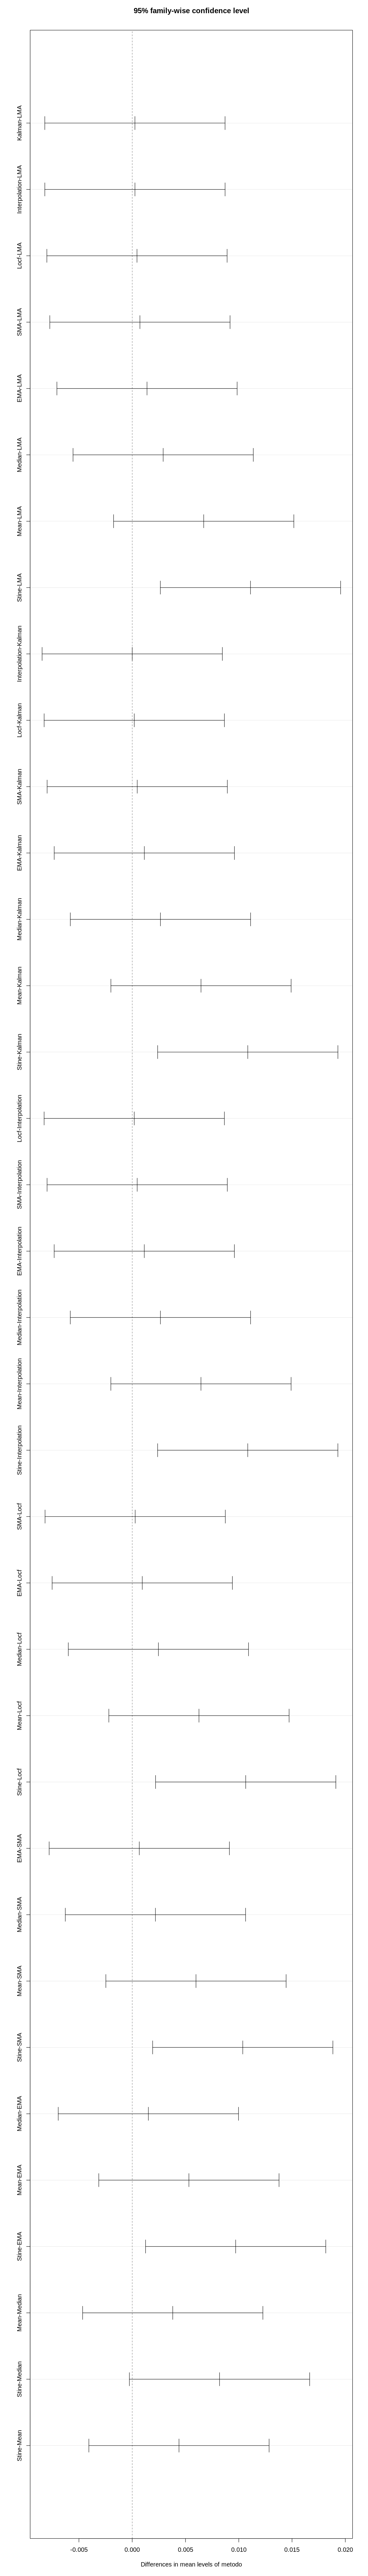

In [70]:
options(repr.plot.width=10, repr.plot.height=70)
#head(todosQuartis)
#select(todosQuartis[,],)
#attach(todosQuartis)
metodo=as.factor(todosQuartis$Algoritmo)
variavel=todosQuartis$q2
#boxplot(variavel~metodo)
modelo1=aov(variavel~metodo)
anova(modelo1)
#plot(modeloa)
#by(variavel, metodo, shapiro.test)
#bartlett.test(variavel~metodo)
comparacoes= TukeyHSD(modelo1, "metodo", ord=T, conf.level = 0.95)
comparacoes
plot(comparacoes)

In [41]:
options(repr.plot.width=10, repr.plot.height=70)
#head(todosQuartis)
#select(todosQuartis[,],)
#attach(todosQuartis)
metodo=as.factor(todos$Algoritmo[which(todos$tamanho<5)])
variavel=todos$rmse[which(todos$tamanho<5)]
#boxplot(variavel~metodo)
modelo1=aov(variavel~metodo)
anova(modelo1)
#plot(modeloa)
#by(variavel, metodo, shapiro.test)
#bartlett.test(variavel~metodo)

comparacoes= TukeyHSD(modelo1, "metodo", ord=T, conf.level = 0.95)
comparacoes
#plot(comparacoes)

ERROR: Error in is.factor(x): object 'todos' not found


Como pode ser visto, o algoritmo spline ficou muito distante dos demais. Retirando o mesmo da plotagem: 

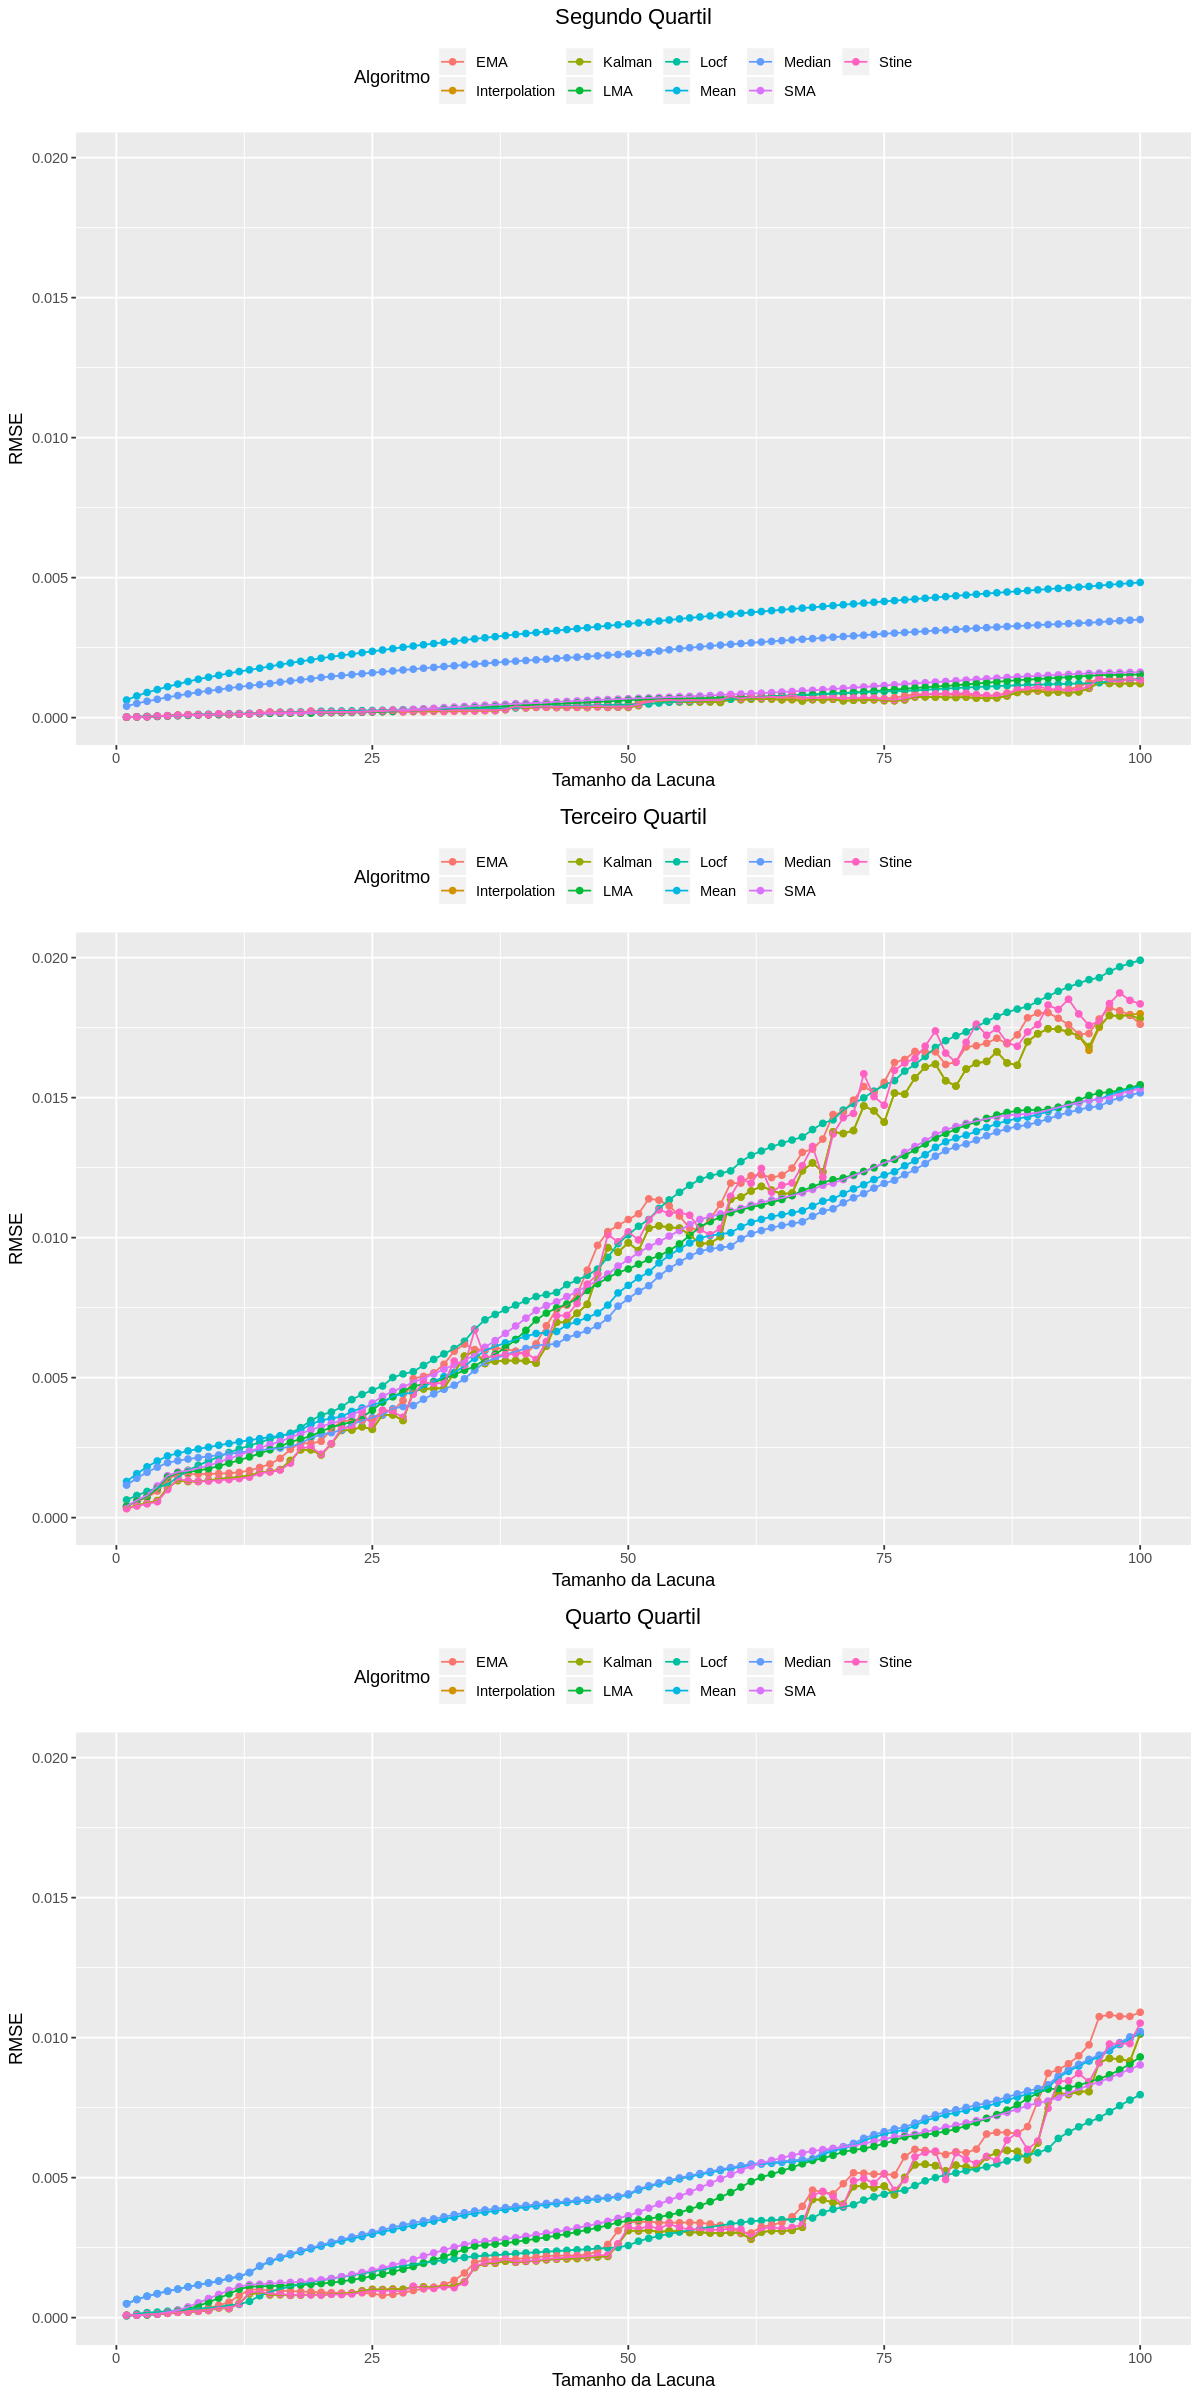

In [48]:
options(repr.plot.width=10, repr.plot.height=20)

todosQuartis=todosQuartis[which(todosQuartis$Algoritmo!="Spline"),]
min=min(todosQuartis$q2, todosQuartis$q3, todosQuartis$q4)
max=max(todosQuartis$q2, todosQuartis$q3, todosQuartis$q4)

todosq2=ggplot(todosQuartis, aes(x=tamanho,y=q2, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
ylim(min,max) + 
ggtitle("Segundo Quartil")+  theme(plot.title = element_text(hjust = 0.5))


todosq3=ggplot(todosQuartis, aes(x=tamanho,y=q3, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
ylim(min,max) + 
ggtitle("Terceiro Quartil")+  theme(plot.title = element_text(hjust = 0.5))

todosq4=ggplot(todosQuartis, aes(x=tamanho,y=q4, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
ylim(min,max) + 
ggtitle("Quarto Quartil")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(todosq2,todosq3,todosq4, nrow=3)



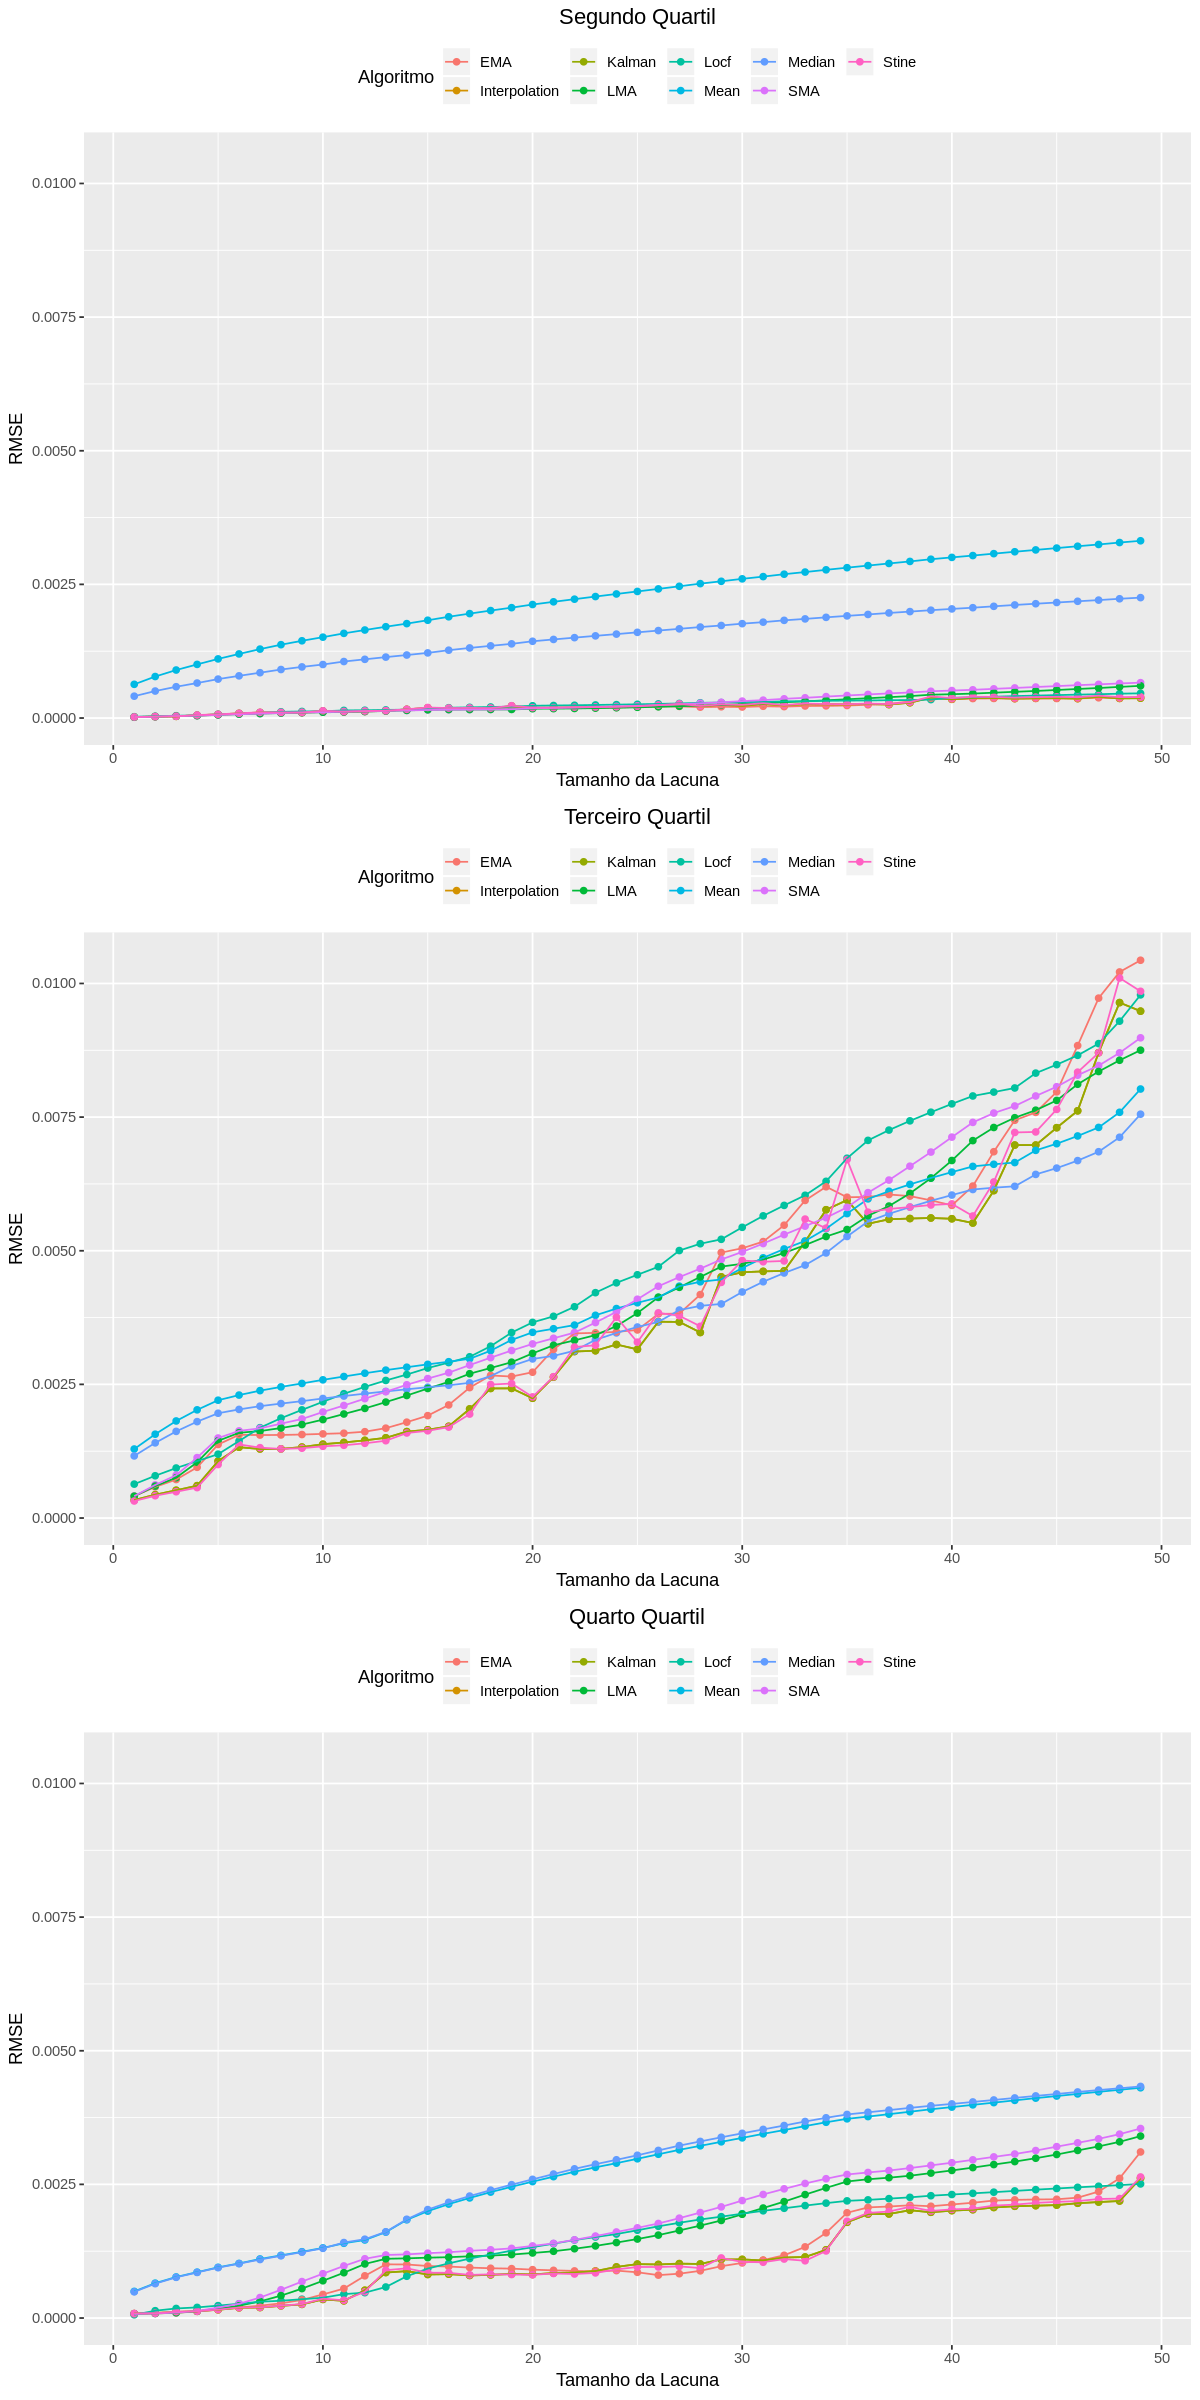

In [49]:
#todosQuartis=todosQuartis[which(todosQuartis$tamanho<=50),]
min=min(todosQuartis$q2[which(todosQuartis$tamanho<50)], todosQuartis$q3[which(todosQuartis$tamanho<50)], todosQuartis$q4[which(todosQuartis$tamanho<50)])
max=max(todosQuartis$q2[which(todosQuartis$tamanho<50)], todosQuartis$q3[which(todosQuartis$tamanho<50)], todosQuartis$q4[which(todosQuartis$tamanho<50)])

p1=ggplot(todosQuartis[which(todosQuartis$tamanho<50),], aes(x=tamanho,y=q2, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")+
ggtitle("Segundo Quartil")+  theme(plot.title = element_text(hjust = 0.5))+
ylim(min,max)

p2=ggplot(todosQuartis[which(todosQuartis$tamanho<50),], aes(x=tamanho,y=q3, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")+
ggtitle("Terceiro Quartil")+  theme(plot.title = element_text(hjust = 0.5))+
ylim(min,max)

p3=ggplot(todosQuartis[which(todosQuartis$tamanho<50),], aes(x=tamanho,y=q4, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")+
ggtitle("Quarto Quartil")+  theme(plot.title = element_text(hjust = 0.5))+
ylim(min,max)

grid.arrange(p1,p2,p3, nrow=3)


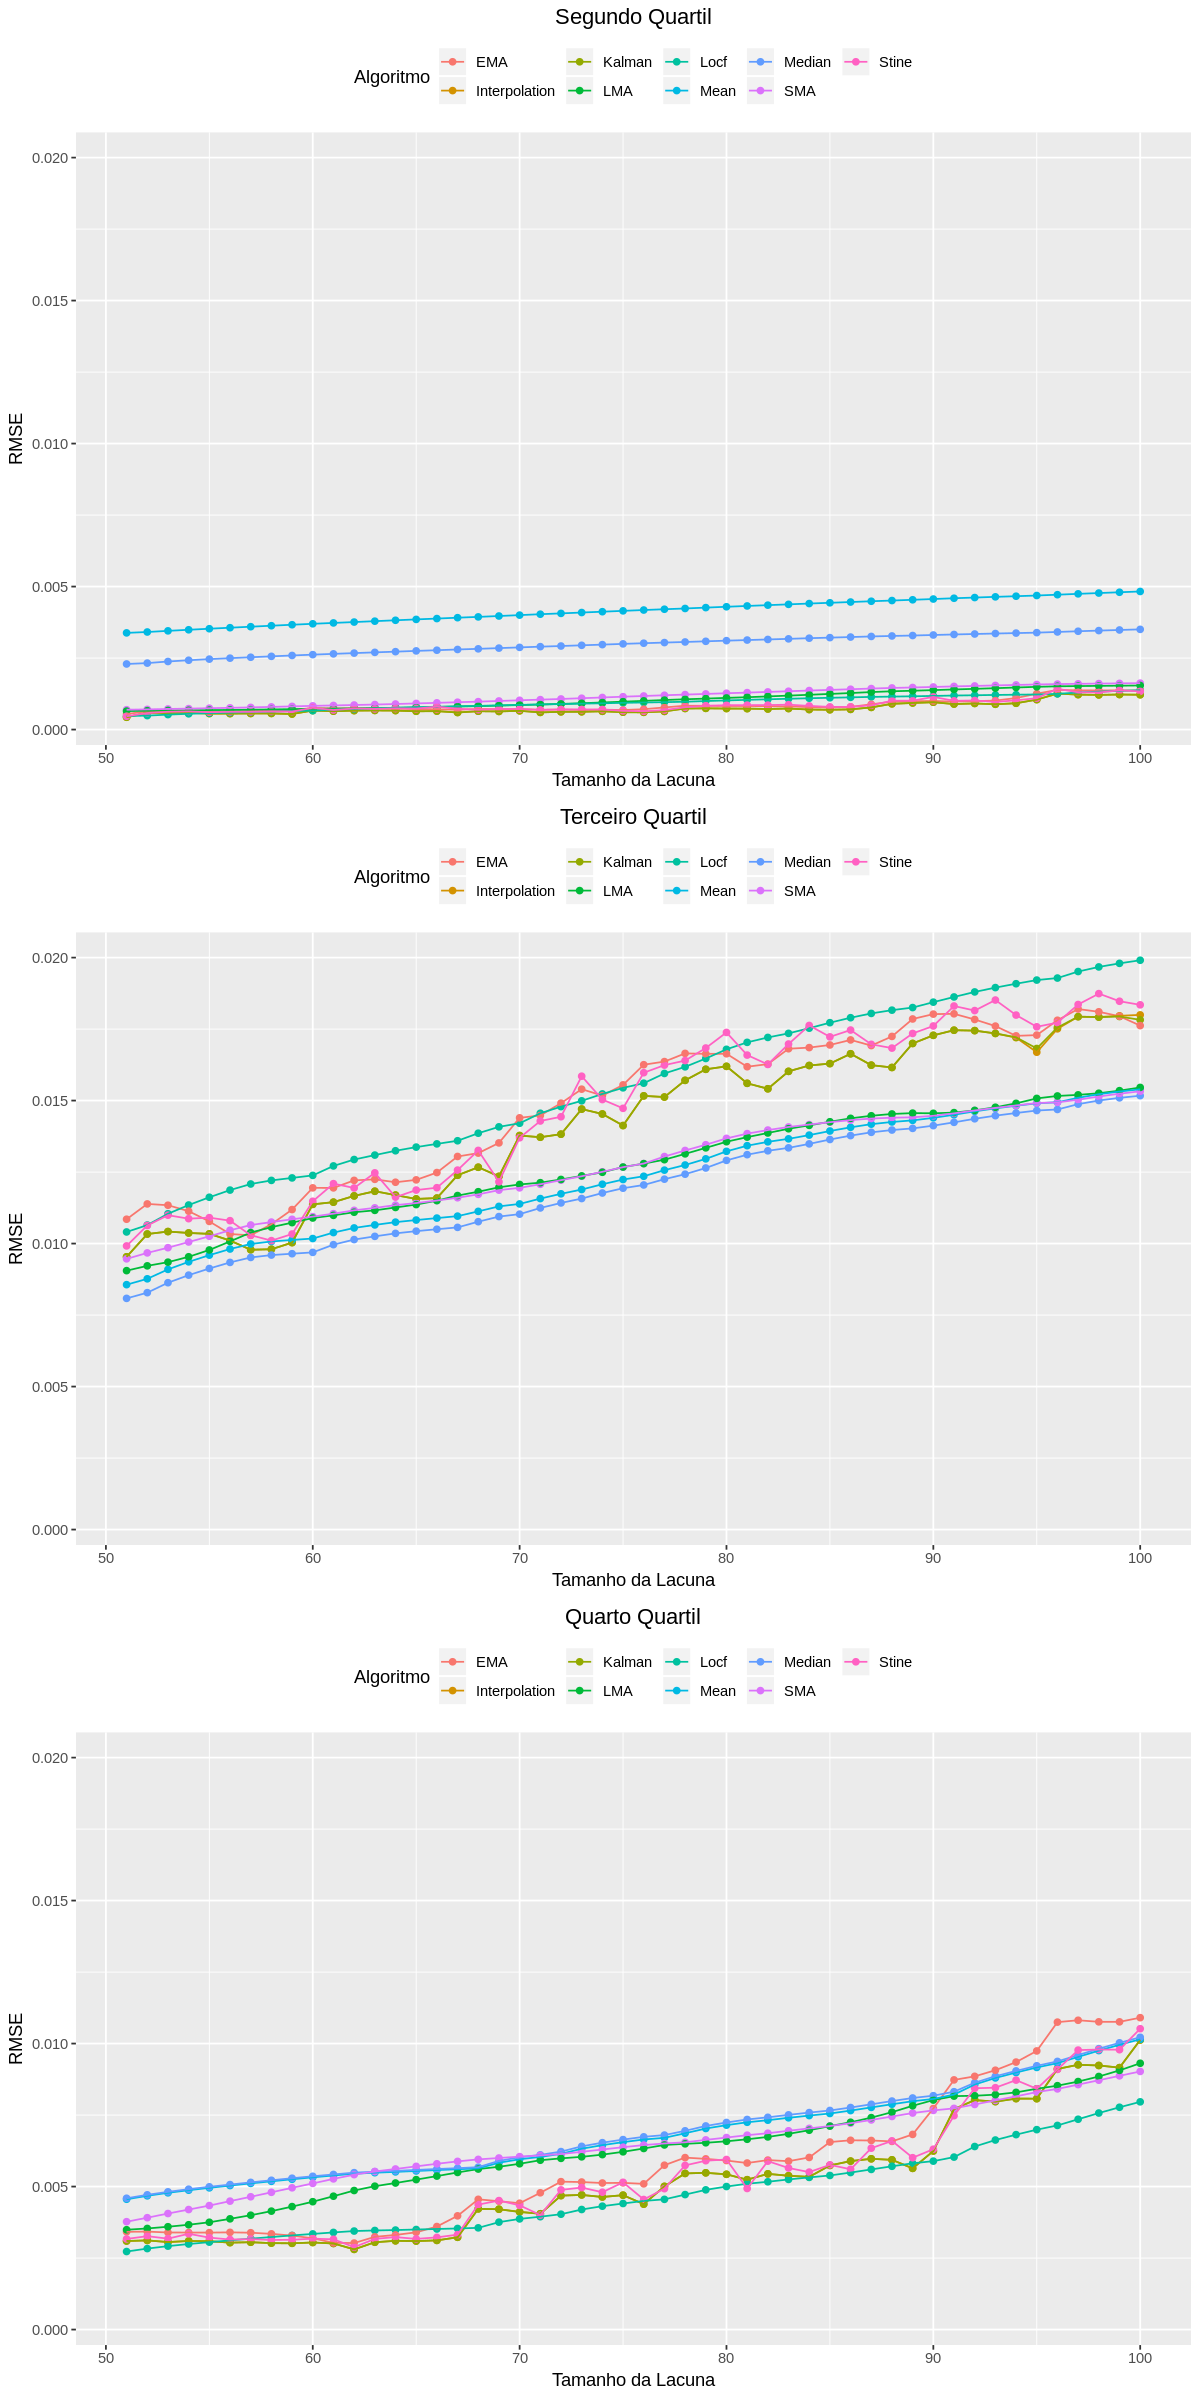

In [50]:
#todosQuartis=todosQuartis[which(todosQuartis$tamanho>=50),]
min=min(todosQuartis$q2[which(todosQuartis$tamanho>50)], todosQuartis$q3[which(todosQuartis$tamanho>50)], todosQuartis$q4[which(todosQuartis$tamanho>50)])
max=max(todosQuartis$q2[which(todosQuartis$tamanho>50)], todosQuartis$q3[which(todosQuartis$tamanho>50)], todosQuartis$q4[which(todosQuartis$tamanho>50)])

p1=ggplot(todosQuartis[which(todosQuartis$tamanho>50),], aes(x=tamanho,y=q2, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")+
ggtitle("Segundo Quartil")+  theme(plot.title = element_text(hjust = 0.5))+
ylim(min,max)

p2=ggplot(todosQuartis[which(todosQuartis$tamanho>50),], aes(x=tamanho,y=q3, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")+
ggtitle("Terceiro Quartil")+  theme(plot.title = element_text(hjust = 0.5))+
ylim(min,max)

p3=ggplot(todosQuartis[which(todosQuartis$tamanho>50),], aes(x=tamanho,y=q4, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")+
ggtitle("Quarto Quartil")+  theme(plot.title = element_text(hjust = 0.5))+
ylim(min,max)

grid.arrange(p1,p2,p3, nrow=3)


Percebe-se que no terceiro quartil o valor do RMSE varia-se mais. Pode ser por conta do maior variação do uso de energia no terceiro quarto do dia (Na perte da tarde) 

trecho de código de funções de tratamento

In [48]:
#função para auxilio
func <- function(i){
    ob=c(i,i+100,i+200)
    return(ob)
}

#função que retorna a média das métricas a partir do tamanho da lacuna, ou seja, 
#media de todas as lacunas de tamanho 1,2,3...n
#Passando como parâmetro os dados, a métrica e o tipo(media, sd ou var)

mediaLac <- function(data_vector, metrica, type){
    tst=data_vector %>% select(metrica)
    mediaLac=c()
    media=c()
    for(z in seq(1,100,1)){
        for (i in seq(z,9000,300)){
            a=(func(i))
            if(type==1){ 
                mediaLac=append(mediaLac,(mean(tst[a,])))
            } else if(type==2){
                mediaLac=append(mediaLac,(sd(tst[a,])))
            }else if(type==3){
                mediaLac=append(mediaLac,(var(tst[a,])))
            }
        }
    }
    for (i in seq(1,3000,30)) {
    #calculando a média
        if(type==1){ 
            media=append(media,(mean(mediaLac[i:(i+29)])))
        } else if(type==2){
            media=append(media,(sd(mediaLac[i:(i+29)])))
        }else if(type==3){
            media=append(media,(var(mediaLac[i:(i+29)])))
        }
    }    
    return (media)
}

Trecho de código de cálculo das médias

In [49]:
mediaKal=c()
mediaInter=c()
mediaLocf=c()
mediaMean=c()
mediaMedian=c()
mediaMalExp=c()
mediaMalLin=c()
mediaMalSim=c()
mediaSpl=c()
mediaSti=c()

mediaInter=as.data.frame(mediaLac(inter,"rmse", 1))
names(mediaInter)=c("rmse")
mediaInter$mse=mediaLac(inter,"mse", 1)
mediaInter$mae=(mediaLac(inter,"mae", 1))
mediaInter$tamanho=tamanhoGap
mediaInter$sdRmse=mediaLac(inter, "rmse", 2)
mediaInter$varRmse=mediaLac(inter, "rmse", 3)
mediaInter$sdMse=mediaLac(inter, "mse", 2)
mediaInter$varMse=mediaLac(inter, "mse", 3)
mediaInter$sdMae=mediaLac(inter, "mae", 2)
mediaInter$varMae=mediaLac(inter, "mae", 3)
mediaInter$Algoritmo="Interpolation"

mediaKal=as.data.frame(mediaLac(kalman,"rmse", 1))
names(mediaKal)=c("rmse")
mediaKal$mse=mediaLac(kalman,"mse", 1)
mediaKal$mae=(mediaLac(kalman,"mae", 1))
mediaKal$tamanho=tamanhoGap
mediaKal$sdRmse=mediaLac(kalman, "rmse", 2)
mediaKal$varRmse=mediaLac(kalman, "rmse", 3)
mediaKal$sdMse=mediaLac(kalman, "mse", 2)
mediaKal$varMse=mediaLac(kalman, "mse", 3)
mediaKal$sdMae=mediaLac(kalman, "mae", 2)
mediaKal$varMae=mediaLac(kalman, "mae", 3)
mediaKal$Algoritmo="Kalman"

mediaLocf=as.data.frame(mediaLac(locf,"rmse", 1))
names(mediaLocf)=c("rmse")
mediaLocf$mse=mediaLac(locf,"mse", 1)
mediaLocf$mae=(mediaLac(locf,"mae", 1))
mediaLocf$tamanho=tamanhoGap
mediaLocf$sdRmse=mediaLac(locf, "rmse", 2)
mediaLocf$varRmse=mediaLac(locf, "rmse", 3)
mediaLocf$sdMse=mediaLac(locf, "mse", 2)
mediaLocf$varMse=mediaLac(locf, "mse", 3)
mediaLocf$sdMae=mediaLac(locf, "mae", 2)
mediaLocf$varMae=mediaLac(locf, "mae", 3)
mediaLocf$Algoritmo="Locf"

mediaMean=as.data.frame(mediaLac(mean,"rmse", 1))
names(mediaMean)=c("rmse")
mediaMean$mse=mediaLac(mean,"mse", 1)
mediaMean$mae=(mediaLac(mean,"mae", 1))
mediaMean$tamanho=tamanhoGap
mediaMean$sdRmse=mediaLac(mean, "rmse", 2)
mediaMean$varRmse=mediaLac(mean, "rmse", 3)
mediaMean$sdMse=mediaLac(mean, "mse", 2)
mediaMean$varMse=mediaLac(mean, "mse", 3)
mediaMean$sdMae=mediaLac(mean, "mae", 2)
mediaMean$varMae=mediaLac(mean, "mae", 3)
mediaMean$Algoritmo="Mean"

mediaMedian=as.data.frame(mediaLac(median,"rmse", 1))
names(mediaMedian)=c("rmse")
mediaMedian$mse=mediaLac(median,"mse", 1)
mediaMedian$mae=(mediaLac(median,"mae", 1))
mediaMedian$tamanho=tamanhoGap
mediaMedian$sdRmse=mediaLac(median, "rmse", 2)
mediaMedian$varRmse=mediaLac(median, "rmse", 3)
mediaMedian$sdMse=mediaLac(median, "mse", 2)
mediaMedian$varMse=mediaLac(median, "mse", 3)
mediaMedian$sdMae=mediaLac(median, "mae", 2)
mediaMedian$varMae=mediaLac(median, "mae", 3)
mediaMedian$Algoritmo="Median"

mediaMalExp=as.data.frame(mediaLac(malExp,"rmse", 1))
names(mediaMalExp)=c("rmse")
mediaMalExp$mse=mediaLac(malExp,"mse", 1)
mediaMalExp$mae=(mediaLac(malExp,"mae", 1))
mediaMalExp$tamanho=tamanhoGap
mediaMalExp$sdRmse=mediaLac(malExp, "rmse", 2)
mediaMalExp$varRmse=mediaLac(malExp, "rmse", 3)
mediaMalExp$sdMse=mediaLac(malExp, "mse", 2)
mediaMalExp$varMse=mediaLac(malExp, "mse", 3)
mediaMalExp$sdMae=mediaLac(malExp, "mae", 2)
mediaMalExp$varMae=mediaLac(malExp, "mae", 3)
mediaMalExp$Algoritmo="EMA"

mediaMalLin=as.data.frame(mediaLac(malLin,"rmse", 1))
names(mediaMalLin)=c("rmse")
mediaMalLin$mse=mediaLac(malLin,"mse", 1)
mediaMalLin$mae=(mediaLac(malLin,"mae", 1))
mediaMalLin$tamanho=tamanhoGap
mediaMalLin$sdRmse=mediaLac(malLin, "rmse", 2)
mediaMalLin$varRmse=mediaLac(malLin, "rmse", 3)
mediaMalLin$sdMse=mediaLac(malLin, "mse", 2)
mediaMalLin$varMse=mediaLac(malLin, "mse", 3)
mediaMalLin$sdMae=mediaLac(malLin, "mae", 2)
mediaMalLin$varMae=mediaLac(malLin, "mae", 3)
mediaMalLin$Algoritmo="LMA"

mediaMalSim=as.data.frame(mediaLac(malSim,"rmse", 1))
names(mediaMalSim)=c("rmse")
mediaMalSim$mse=mediaLac(malSim,"mse", 1)
mediaMalSim$mae=(mediaLac(malSim,"mae", 1))
mediaMalSim$tamanho=tamanhoGap
mediaMalSim$sdRmse=mediaLac(malSim, "rmse", 2)
mediaMalSim$varRmse=mediaLac(malSim, "rmse", 3)
mediaMalSim$sdMse=mediaLac(malSim, "mse", 2)
mediaMalSim$varMse=mediaLac(malSim, "mse", 3)
mediaMalSim$sdMae=mediaLac(malSim, "mae", 2)
mediaMalSim$varMae=mediaLac(malSim, "mae", 3)
mediaMalSim$Algoritmo="SMA"

mediaSpl=as.data.frame(mediaLac(spl,"rmse", 1))
names(mediaSpl)=c("rmse")
mediaSpl$mse=mediaLac(spl,"mse", 1)
mediaSpl$mae=(mediaLac(spl,"mae", 1))
mediaSpl$tamanho=tamanhoGap
mediaSpl$sdRmse=mediaLac(spl, "rmse", 2)
mediaSpl$varRmse=mediaLac(spl, "rmse", 3)
mediaSpl$sdMse=mediaLac(spl, "mse", 2)
mediaSpl$varMse=mediaLac(spl, "mse", 3)
mediaSpl$sdMae=mediaLac(spl, "mae", 2)
mediaSpl$varMae=mediaLac(spl, "mae", 3)
mediaSpl$Algoritmo="Spline"

mediaSti=as.data.frame(mediaLac(sti,"rmse", 1))
names(mediaSti)=c("rmse")
mediaSti$mse=mediaLac(sti,"mse", 1)
mediaSti$mae=(mediaLac(sti,"mae", 1))
mediaSti$tamanho=tamanhoGap
mediaSti$sdRmse=mediaLac(sti, "rmse", 2)
mediaSti$varRmse=mediaLac(sti, "rmse", 3)
mediaSti$sdMse=mediaLac(sti, "mse", 2)
mediaSti$varMse=mediaLac(sti, "mse", 3)
mediaSti$sdMae=mediaLac(sti, "mae", 2)
mediaSti$varMae=mediaLac(sti, "mae", 3)
mediaSti$Algoritmo="Stine"

todos = rbind(mediaKal, mediaInter, mediaLocf, mediaMedian, mediaMean, mediaMalExp, mediaMalLin, mediaMalSim, mediaSpl, mediaSti)

In [50]:
head(todos)

rmse,mse,mae,tamanho,sdRmse,varRmse,sdMse,varMse,sdMae,varMae,Algoritmo
0.0001456204,4.350844e-07,2.077160e-06,1,0.0006260773,2.787527e-12,2.906751e-06,1.532208e-21,9.201771e-06,1.309160e-19,Kalman
0.0001859946,7.184584e-07,3.124614e-06,2,0.0008072847,8.093537e-12,4.961386e-06,1.381101e-20,1.418217e-05,7.745025e-19,Kalman
0.0002213076,1.020228e-06,4.154192e-06,3,0.0009626169,1.652266e-11,7.080305e-06,5.896632e-20,1.919458e-05,2.624591e-18,Kalman
0.0002617546,1.326803e-06,5.461034e-06,4,0.0010952876,2.833666e-11,9.265460e-06,1.767888e-19,2.413639e-05,6.734308e-18,Kalman
0.0004284569,3.174029e-06,1.012178e-05,5,0.0016761291,1.020640e-10,1.754716e-05,1.367472e-18,4.226299e-05,4.274831e-17,Kalman
0.0005340816,4.911934e-06,1.337281e-05,6,0.0020760308,2.407361e-10,2.708675e-05,8.415927e-18,5.564604e-05,1.292576e-16,Kalman


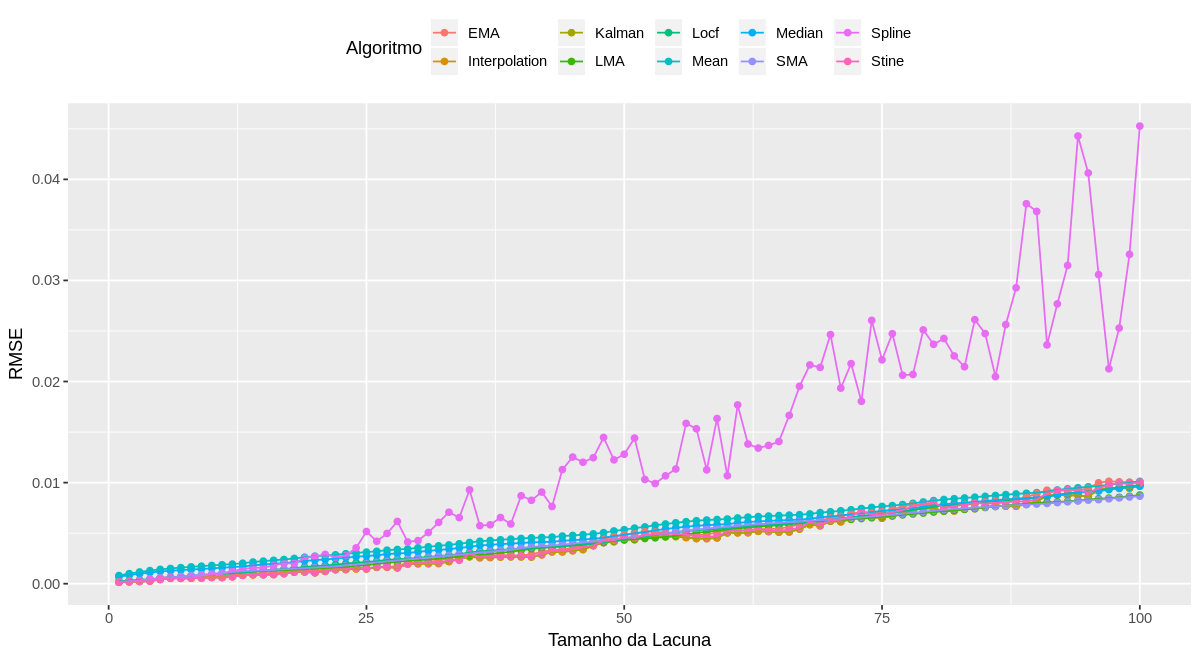

In [51]:
options(repr.plot.width=10, repr.plot.height=5.5)
ggplot(todos, aes(x=tamanho,y=rmse, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")


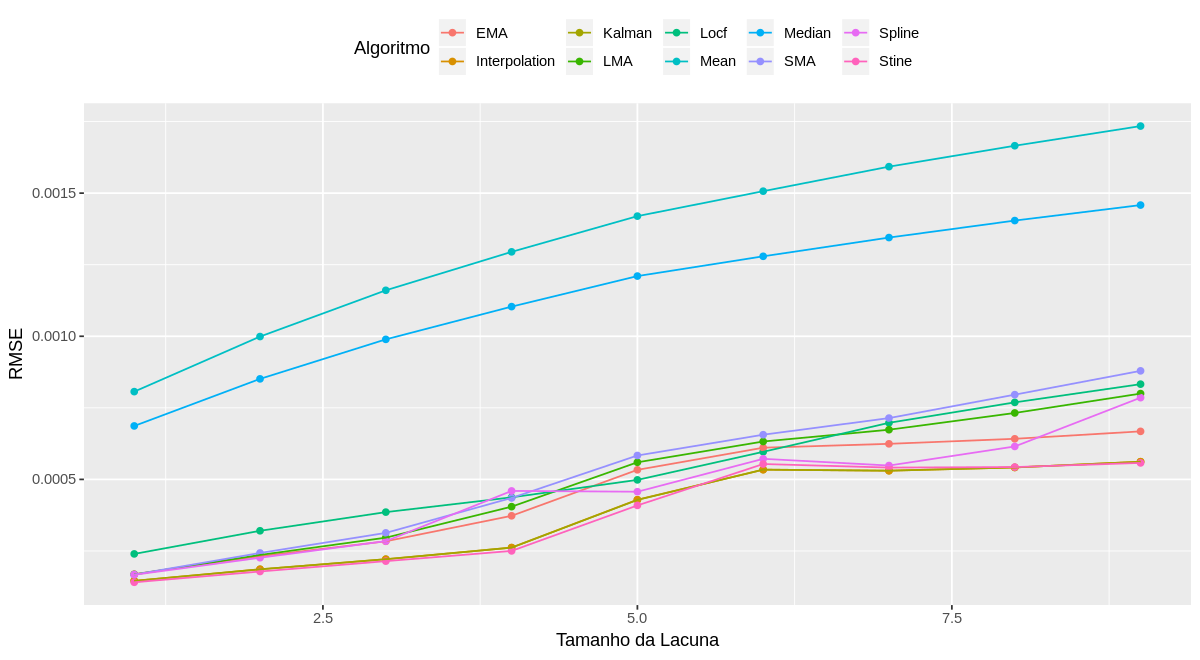

In [52]:
ggplot(todos[which(todos$tamanho<10),], aes(x=tamanho,y=rmse, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")

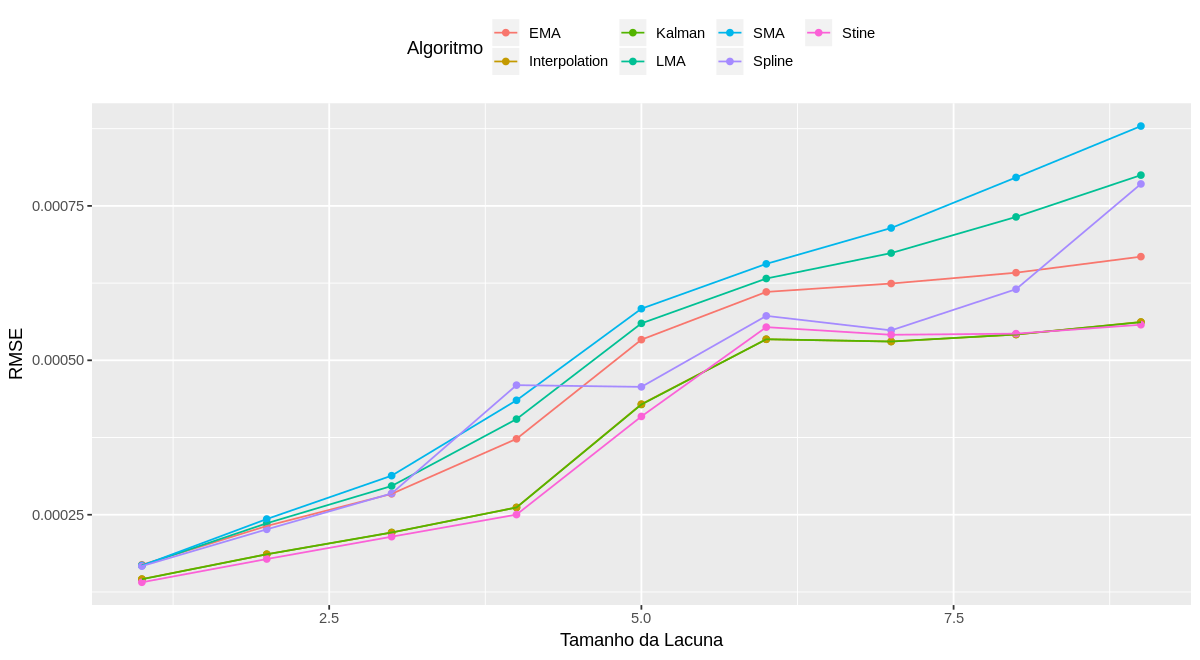

In [53]:
ggplot(todos[which(todos$Algoritmo!= "Locf"  & todos$Algoritmo!= "Mean"  & todos$Algoritmo!= "Median"  &  todos$tamanho<10),], aes(x=tamanho,y=rmse, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")


In [137]:
n=90 #tamanho da amostra. Ou seja, tem 90 lacunas de tamanho 1, 2 de tamanho 20... 90 de tamanho 100
error=qnorm(0.975)*todos$sd/sqrt(n)
todos$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right

ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), linetype=11,  position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna")


ERROR: Error in eval(expr, envir, enclos): object 'todos' not found


In [ ]:
ggplot(todos[which(todos$algoritmo!= "Spline" & todos$tamanho<3000),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error),linetype=11,  position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna") 
    


In [ ]:

ggplot(todos[which(todos$algoritmo!= "Spline" & todos$tamanho>50),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
   # geom_errorbar(aes(ymin=media-error, ymax=media+error),linetype=11,  position=pd) +
    labs(y="Tempo médio de Execução", x="Tamanho da Lacuna") 
    


In [ ]:
(filter(todos, tamanho==100))

In [ ]:
teste=(select(todos[order(todos$tamanho, todos$media, decreasing=c(FALSE,FALSE)),], -sd))

by_mean <- group_by(teste, tamanho)
#summarise(by_mean, rmseMin = min(media))

In [ ]:
#Agrupando o dataframe pelo tamanho e algoritmo
by_alg=group_by(teste, tamanho, algoritmo)
#select(by_alg, -var,-error)
#sumarizando o agrupamento pela menor média
by_length=summarise(by_alg, media=min(media))
tam=by_length %>% arrange(tamanho,media)
write.table(tam,"tamanhoEmedia.txt")
#filtrando o resultado pela menor média. 
a=by_length%>% filter(media==min(media))
a

write.table(a, "min.txt")

In [ ]:
#função que retorna a média das métricas a partir do tamanho da lacuna, ou seja, 
#media de todas as lacunas de tamanho 1,2,3...n
#Passando como parâmetro os dados, a métrica e o tipo(media, sd ou var)

mediaLacTempo <- function(data_vector){
    tst=data_vector
    mediaLac=c()
    media=c()
    for(z in seq(1,100,1)){
        for (i in seq(z,9000,300)){
            a=(func(i))
            mediaLac=append(mediaLac,(mean(tst[a])))
        }
    }
    for (i in seq(1,3000,30)) {
        #calculando a média
        media=append(media,(mean(mediaLac[i:(i+29)])))
    }    
    return (media)
}

In [ ]:
aux=scan("../ESC/1-100/alg.txt", what="complex")
tempo=as.data.frame(scan("../ESC/1-100/tempo.txt"))
names(tempo)=c("tempo")
tempo$Algoritmo=aux


In [ ]:

linear_interpolation=mediaLacTempo(tempo[which(tempo$Algoritmo=="linear_interpolation"),1])
spline_interpolation=mediaLacTempo(tempo[which(tempo$Algoritmo=="spline_interpolation"),1])
stine_interpolation=mediaLacTempo(tempo[which(tempo$Algoritmo=="stine_interpolation"),1])
kalmanSmoothing=mediaLacTempo(tempo[which(tempo$Algoritmo=="kalmanSmoothing"),1])
locf=mediaLacTempo(tempo[which(tempo$Algoritmo=="locf"),1])
movingAverage_simple=mediaLacTempo(tempo[which(tempo$Algoritmo=="movingAverage_simple"),1])
movingAverage_linear=mediaLacTempo(tempo[which(tempo$Algoritmo=="movingAverage_linear"),1])
movingAverage_exponential=mediaLacTempo(tempo[which(tempo$Algoritmo=="movingAverage_exponential"),1])
mean=mediaLacTempo(tempo[which(tempo$Algoritmo=="mean"),1])
median=mediaLacTempo(tempo[which(tempo$Algoritmo=="median"),1])
mode=mediaLacTempo(tempo[which(tempo$Algoritmo=="mode"),1])


todosTempo=rbind(linear_interpolation, spline_interpolation, stine_interpolation,kalmanSmoothing,locf,
                movingAverage_simple, movingAverage_linear,movingAverage_exponential, mean, median, mode)


In [ ]:
plot(todosTempo[3,])

In [ ]:
ggplot(todos, aes(x=tamanho,y=rmse, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")

Histograma dos algoritmos
=====
plotagem do histogram de cada algoritmo por cada quartil

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


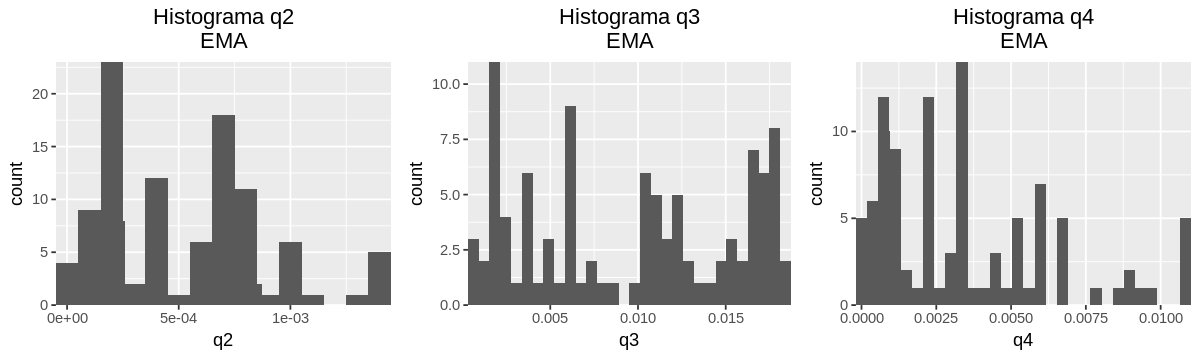

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


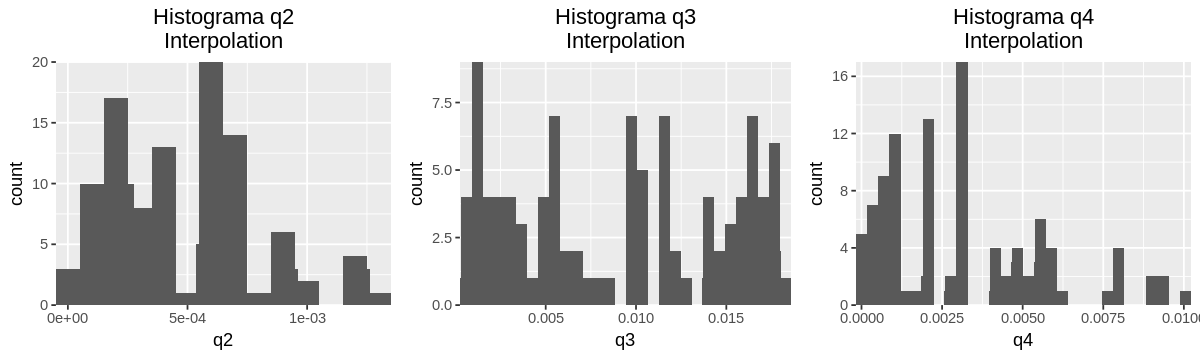

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


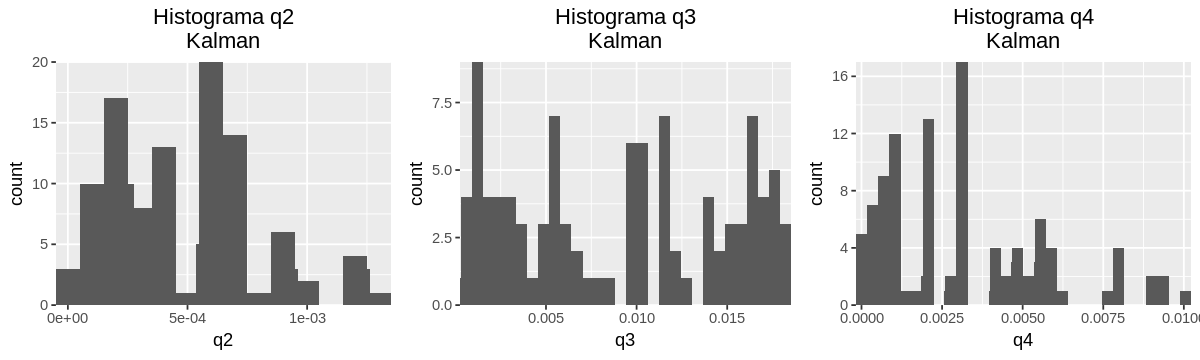

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


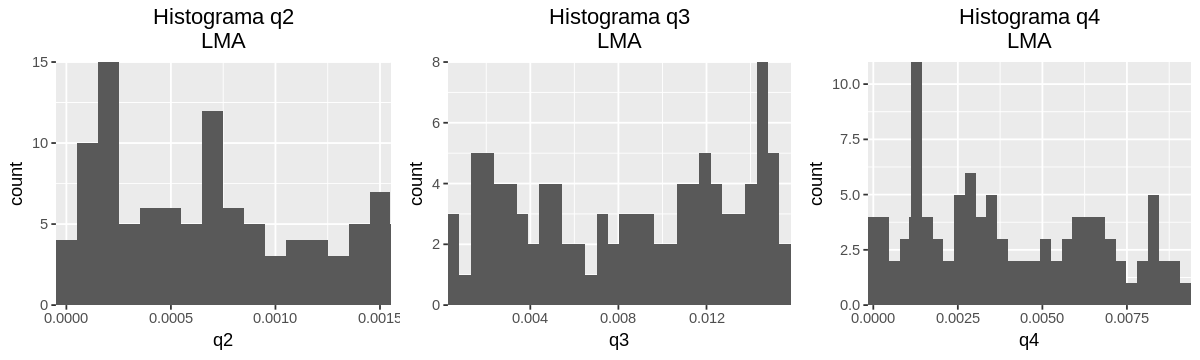

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


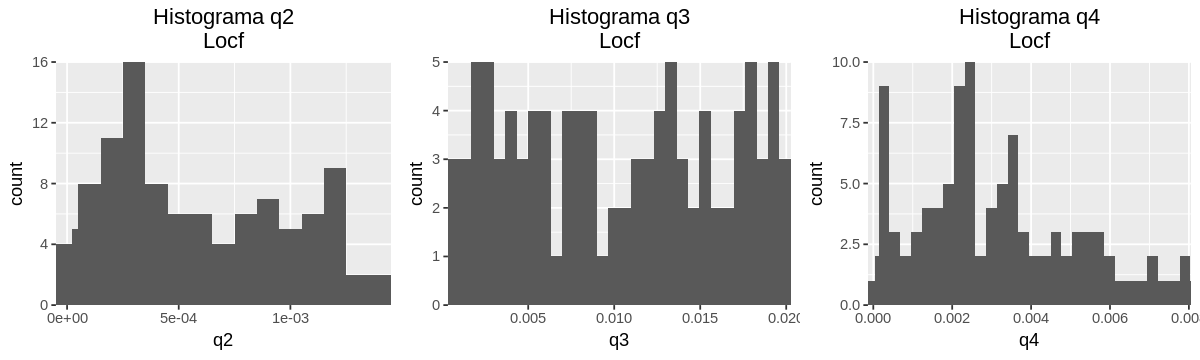

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


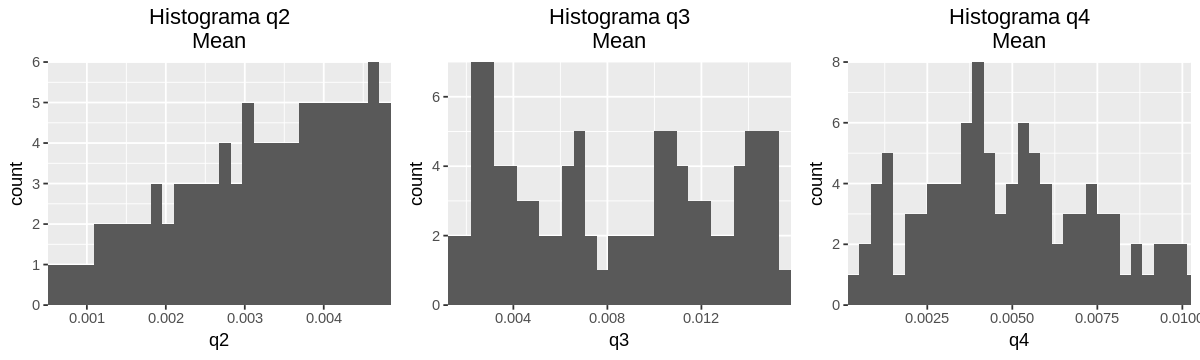

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


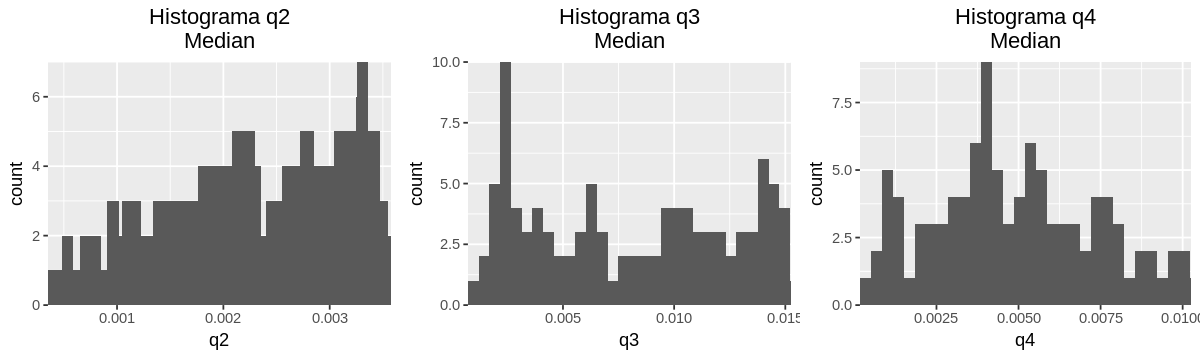

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


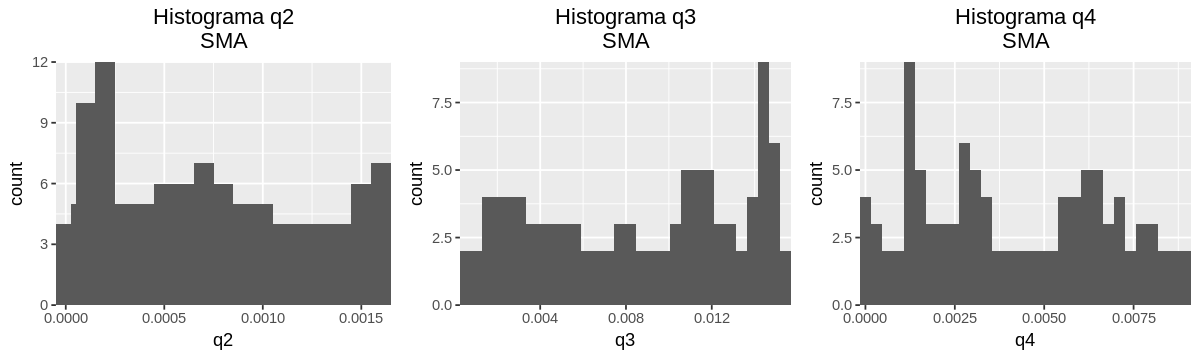

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


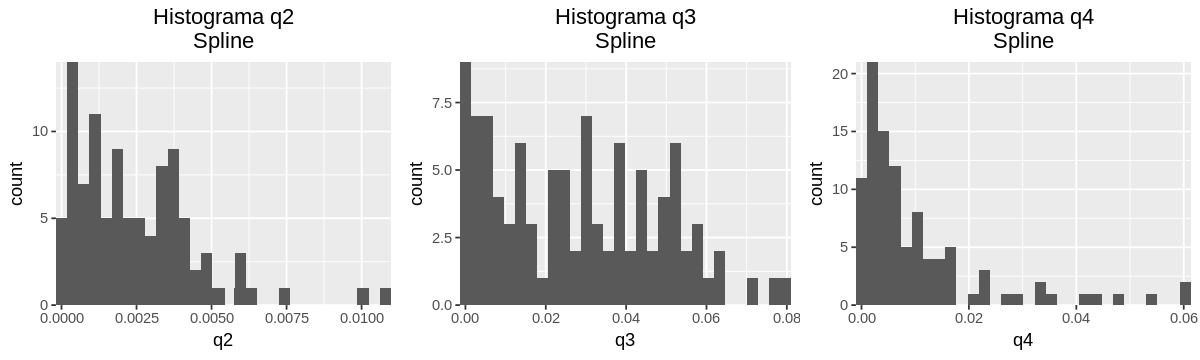

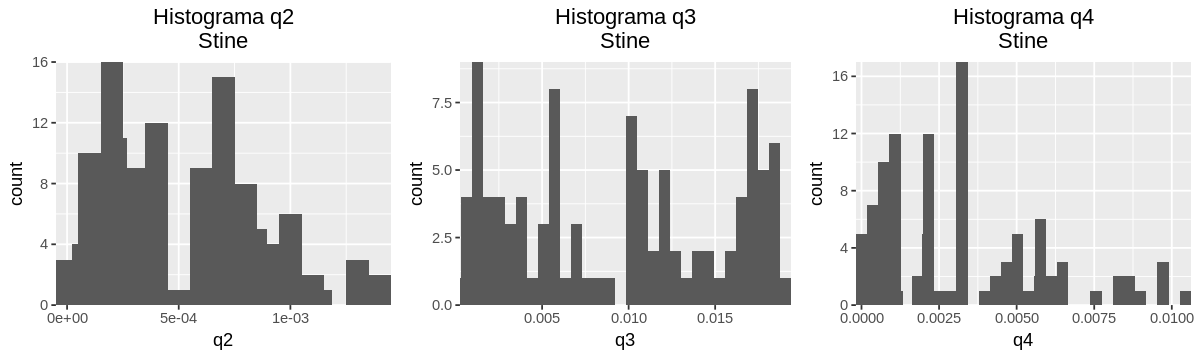

In [39]:
options(repr.plot.width=10, repr.plot.height=3)
#summary(todosQuartis)

plot_EMAq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="EMA"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n EMA ")+  theme(plot.title = element_text(hjust = 0.5))

plot_EMAq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="EMA"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n EMA ")+  theme(plot.title = element_text(hjust = 0.5))

plot_EMAq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="EMA"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n EMA ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_EMAq2, plot_EMAq3, plot_EMAq4, nrow=1, ncol=3)

plot_Interpolationq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Interpolation"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n Interpolation ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Interpolationq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Interpolation"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n Interpolation ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Interpolationq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Interpolation"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n Interpolation ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_Interpolationq2, plot_Interpolationq3, plot_Interpolationq4, nrow=1, ncol=3)

plot_Kalmanq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Kalman"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n Kalman ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Kalmanq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Kalman"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n Kalman ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Kalmanq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Kalman"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n Kalman ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_Kalmanq2, plot_Kalmanq3, plot_Kalmanq4, nrow=1, ncol=3)

plot_LMAq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="LMA"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n LMA ")+  theme(plot.title = element_text(hjust = 0.5))

plot_LMAq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="LMA"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n LMA ")+  theme(plot.title = element_text(hjust = 0.5))

plot_LMAq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="LMA"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n LMA ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_LMAq2, plot_LMAq3, plot_LMAq4, nrow=1, ncol=3)

plot_Locfq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Locf"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n Locf ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Locfq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Locf"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n Locf ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Locfq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Locf"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n Locf ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_Locfq2, plot_Locfq3, plot_Locfq4, nrow=1, ncol=3)

plot_Meanq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Mean"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n Mean ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Meanq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Mean"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n Mean ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Meanq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Mean"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n Mean ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_Meanq2, plot_Meanq3, plot_Meanq4, nrow=1, ncol=3)

plot_Medianq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Median"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n Median ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Medianq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Median"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n Median ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Medianq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Median"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n Median ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_Medianq2, plot_Medianq3, plot_Medianq4, nrow=1, ncol=3)

plot_SMAq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="SMA"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n SMA ")+  theme(plot.title = element_text(hjust = 0.5))

plot_SMAq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="SMA"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n SMA ")+  theme(plot.title = element_text(hjust = 0.5))

plot_SMAq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="SMA"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n SMA ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_SMAq2, plot_SMAq3, plot_SMAq4, nrow=1, ncol=3)

plot_Splineq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Spline"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n Spline ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Splineq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Spline"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n Spline ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Splineq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Spline"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n Spline ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_Splineq2, plot_Splineq3, plot_Splineq4, nrow=1, ncol=3)

plot_Stineq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Stine"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n Stine ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Stineq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Stine"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n Stine ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Stineq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Stine"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n Stine ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_Stineq2, plot_Stineq3, plot_Stineq4, nrow=1, ncol=3)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


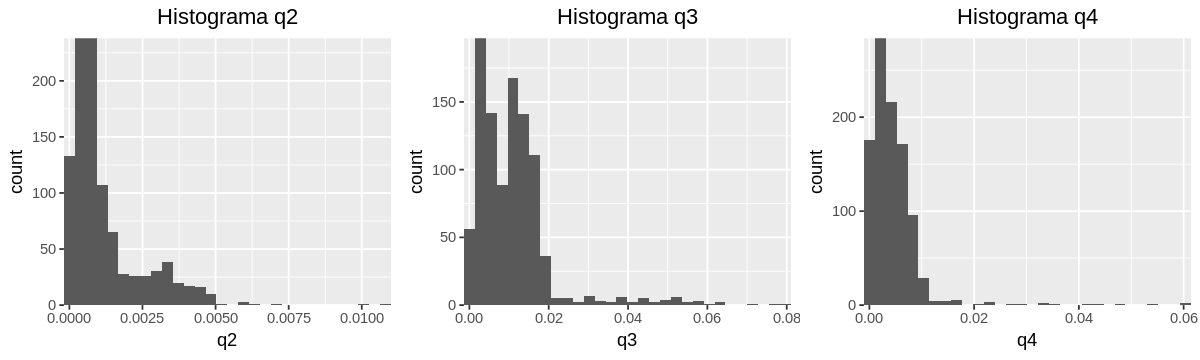

In [38]:
options(repr.plot.width=10, repr.plot.height=3)

#summary(todosQuartis)
plot_q2=ggplot(todosQuartis, aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.00001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
   # geom_density() + 

    ggtitle("Histograma q2")+  theme(plot.title = element_text(hjust = 0.5))

plot_q3=ggplot(todosQuartis, aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.00001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3")+  theme(plot.title = element_text(hjust = 0.5))

plot_q4=ggplot(todosQuartis, aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.00001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_q2, plot_q3, plot_q4, ncol=3)
